In [1]:
%config Completer.use_jedi = False
import numpy as np
import sys
sys.path.append('../pyecog2')
sys.path.append('../pyecog2/coding_tests')
sys.path.append('../')
from ProjectClass import Project,FileBuffer
from pyecog2.main import MainModel
import json
import feature_extractor 
import importlib
from h5loader import H5File
importlib.reload(feature_extractor)
FeatureExtractor = feature_extractor.FeatureExtractor

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Building File Tree...


In [2]:
from FeatureExtractorGUI import FeatureExtractorWindow

In [4]:
class LambdaFunctionContainer():
    def __init__(self,flist):
        self.fnames = []
        for i,f in enumerate(flist):
            self.__dict__['f'+str(i)] = f
            self.fnames.append('f'+str(i))
        
    def my_worker(self,x):
        return[self.__dict__[f](x) for f in self.fnames]

def my_worker_init(container):
    global _container
    _container = container
    
def my_worker(x):
    return[_container.__dict__[f](x) for f in _container.fnames]

In [5]:
 a =1
    

In [5]:
container0 = LambdaFunctionContainer([lambda x: x ** 2,lambda x: x ** 4])
my_worker_init(container0)
my_worker(4)

[16, 256]

In [7]:
if 'b' not in locals():
    print('nope')

nope


In [6]:
def my_worker_flist_init(flist):
    global _flist
    _flist = flist
    
def my_worker_flist(x):
    return[f(x) for f in _flist]

In [7]:
_container

In [10]:

with Pool(None, initializer=my_worker_init, initargs=(container0,)) as p:
    print(p.map(my_worker, range(100)))

[[0, 0], [1, 1], [4, 16], [9, 81], [16, 256], [25, 625], [36, 1296], [49, 2401], [64, 4096], [81, 6561], [100, 10000], [121, 14641], [144, 20736], [169, 28561], [196, 38416], [225, 50625], [256, 65536], [289, 83521], [324, 104976], [361, 130321], [400, 160000], [441, 194481], [484, 234256], [529, 279841], [576, 331776], [625, 390625], [676, 456976], [729, 531441], [784, 614656], [841, 707281], [900, 810000], [961, 923521], [1024, 1048576], [1089, 1185921], [1156, 1336336], [1225, 1500625], [1296, 1679616], [1369, 1874161], [1444, 2085136], [1521, 2313441], [1600, 2560000], [1681, 2825761], [1764, 3111696], [1849, 3418801], [1936, 3748096], [2025, 4100625], [2116, 4477456], [2209, 4879681], [2304, 5308416], [2401, 5764801], [2500, 6250000], [2601, 6765201], [2704, 7311616], [2809, 7890481], [2916, 8503056], [3025, 9150625], [3136, 9834496], [3249, 10556001], [3364, 11316496], [3481, 12117361], [3600, 12960000], [3721, 13845841], [3844, 14776336], [3969, 15752961], [4096, 16777216], [422

In [11]:

with Pool(None, initializer=my_worker_flist_init, initargs=([lambda x: x ** 2,lambda x: x ** 4],)) as p:
  print(p.map(my_worker_flist, range(100)))

[[0, 0], [1, 1], [4, 16], [9, 81], [16, 256], [25, 625], [36, 1296], [49, 2401], [64, 4096], [81, 6561], [100, 10000], [121, 14641], [144, 20736], [169, 28561], [196, 38416], [225, 50625], [256, 65536], [289, 83521], [324, 104976], [361, 130321], [400, 160000], [441, 194481], [484, 234256], [529, 279841], [576, 331776], [625, 390625], [676, 456976], [729, 531441], [784, 614656], [841, 707281], [900, 810000], [961, 923521], [1024, 1048576], [1089, 1185921], [1156, 1336336], [1225, 1500625], [1296, 1679616], [1369, 1874161], [1444, 2085136], [1521, 2313441], [1600, 2560000], [1681, 2825761], [1764, 3111696], [1849, 3418801], [1936, 3748096], [2025, 4100625], [2116, 4477456], [2209, 4879681], [2304, 5308416], [2401, 5764801], [2500, 6250000], [2601, 6765201], [2704, 7311616], [2809, 7890481], [2916, 8503056], [3025, 9150625], [3136, 9834496], [3249, 10556001], [3364, 11316496], [3481, 12117361], [3600, 12960000], [3721, 13845841], [3844, 14776336], [3969, 15752961], [4096, 16777216], [422

In [12]:
main_model = MainModel()
project=Project(main_model=main_model)
# project.load_from_json('/media/mfpleite/LaCie_1/ML_pyecog_2/AwesomeProject.pyecog')
project.load_from_json('/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_Mikail_2/MikailProject.pyecog')

[]
copy from - history reset
[]
copy from - history reset
[]
copy from - history reset
[]
copy from - history reset
looking for None
current animal: None


In [13]:
a = project.animal_list[0]

In [14]:
fb = FileBuffer(animal=a)

In [15]:
a.eeg_init_time[0]

1608055233

In [16]:
data,time = fb.get_data_from_range([a.eeg_init_time[0],a.eeg_init_time[0] + a.eeg_duration[0]])

Non-contiguous data: restarting buffer...
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_Mikail_2/ndf2h5/Animal 1/M1608055233_2020-12-15-19-00-33_tids_[117, 118].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_Mikail_2/ndf2h5/Animal 1/M1608055233_2020-12-15-19-00-33_tids_[117, 118].meta']


In [17]:
data.shape

(921600, 2)

In [24]:
fb.get_nchannels()

0

In [18]:
fdata = np.fft.rfft(data,axis=0)/len(data)

In [19]:
fdata.shape

(460801, 2)

In [13]:
fe = FeatureExtractor()

In [14]:
a = project.animal_list[2]

In [19]:
a.eeg_files[0]

'/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_Mikail_2/ndf2h5/Animal 3/M1610639025_2021-01-14-16-43-45_tids_[97, 98].meta'

In [21]:
a.eeg_duration[0]

3600

In [154]:
a = [1,2,3]
b = [4,5,6]
list(zip(a,b))

[(1, 4), (2, 5), (3, 6)]

In [151]:
[(a.eeg_files[i], a.eeg_duration[i]) for i in range(379,384)]

[('/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_129/M1528512507_2018-06-09-03-48-27_tids_[129].meta',
  3600),
 ('/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_129/M1528516107_2018-06-09-04-48-27_tids_[129].meta',
  3600),
 ('/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_129/M1528519707_2018-06-09-05-48-27_tids_[129].meta',
  3600),
 ('/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_129/M1528523307_2018-06-09-06-48-27_tids_[129].meta',
  3600),
 ('/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_129/M1528526907_2018-06-09-07-48-27_tids_[129].meta',
  3600)]

In [152]:
for animal in project.animal_list[-1:]:
    fe.extract_features_from_animal(animal,re_write = True)

Extracting features for file 1 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526920165_2018-05-21-17-29-25_tids_[8].meta
time_range: [1526920165, 1526923765] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526920165_2018-05-21-17-29-25_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526920165_2018-05-21-17-29-25_tids_[8].fmeta
window_starts: [1.52692016e+09 1.52692017e+09 1.52692017e+09 ... 1.52692376e+09
 1.52692376e+09 1.52692376e+09]
Non-contiguous data: restarting buffer...
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526920165_2018-05-21-17-29-25_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526920165_2018-05-21-17-29-25_tids_[8].meta']
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526920165_2018-05-21-17-29-25_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526923

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526945365_2018-05-22-00-29-25_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526948965_2018-05-22-01-29-25_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526941765_2018-05-21-23-29-25_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526945365_2018-05-22-00-29-25_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526948965_2018-05-22-01-29-25_tids_[8].meta']
Extracting features for file 9 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526948965_2018-05-22-01-29-25_tids_[8].meta
time_range: [1526948965, 1526952565] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526948965_2018-05-22-01-29-25_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526948965_2018-05-22-01-29-25_tids_[8].fmeta
window_starts: [1.52694896e+09 1.

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526974165_2018-05-22-08-29-25_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526977765_2018-05-22-09-29-25_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526970565_2018-05-22-07-29-25_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526974165_2018-05-22-08-29-25_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526977765_2018-05-22-09-29-25_tids_[8].meta']
Extracting features for file 17 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526977765_2018-05-22-09-29-25_tids_[8].meta
time_range: [1526977765, 1526981365] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526977765_2018-05-22-09-29-25_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1526977765_2018-05-22-09-29-25_tids_[8].fmeta
window_starts: [1.52697776e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527005916_2018-05-22-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527009516_2018-05-22-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527002316_2018-05-22-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527005916_2018-05-22-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527009516_2018-05-22-18-18-36_tids_[8].meta']
Extracting features for file 25 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527009516_2018-05-22-18-18-36_tids_[8].meta
time_range: [1527009516, 1527013116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527009516_2018-05-22-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527009516_2018-05-22-18-18-36_tids_[8].fmeta
window_starts: [1.52700952e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527034716_2018-05-23-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527038316_2018-05-23-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527031116_2018-05-23-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527034716_2018-05-23-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527038316_2018-05-23-02-18-36_tids_[8].meta']
Extracting features for file 33 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527038316_2018-05-23-02-18-36_tids_[8].meta
time_range: [1527038316, 1527041916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527038316_2018-05-23-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527038316_2018-05-23-02-18-36_tids_[8].fmeta
window_starts: [1.52703832e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527063516_2018-05-23-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527067116_2018-05-23-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527059916_2018-05-23-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527063516_2018-05-23-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527067116_2018-05-23-10-18-36_tids_[8].meta']
Extracting features for file 41 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527067116_2018-05-23-10-18-36_tids_[8].meta
time_range: [1527067116, 1527070716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527067116_2018-05-23-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527067116_2018-05-23-10-18-36_tids_[8].fmeta
window_starts: [1.52706712e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527092316_2018-05-23-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527095916_2018-05-23-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527088716_2018-05-23-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527092316_2018-05-23-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527095916_2018-05-23-18-18-36_tids_[8].meta']
Extracting features for file 49 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527095916_2018-05-23-18-18-36_tids_[8].meta
time_range: [1527095916, 1527099516] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527095916_2018-05-23-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527095916_2018-05-23-18-18-36_tids_[8].fmeta
window_starts: [1.52709592e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527121116_2018-05-24-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527124716_2018-05-24-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527117516_2018-05-24-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527121116_2018-05-24-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527124716_2018-05-24-02-18-36_tids_[8].meta']
Extracting features for file 57 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527124716_2018-05-24-02-18-36_tids_[8].meta
time_range: [1527124716, 1527128316] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527124716_2018-05-24-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527124716_2018-05-24-02-18-36_tids_[8].fmeta
window_starts: [1.52712472e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527149916_2018-05-24-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527153516_2018-05-24-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527146316_2018-05-24-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527149916_2018-05-24-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527153516_2018-05-24-10-18-36_tids_[8].meta']
Extracting features for file 65 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527153516_2018-05-24-10-18-36_tids_[8].meta
time_range: [1527153516, 1527157116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527153516_2018-05-24-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527153516_2018-05-24-10-18-36_tids_[8].fmeta
window_starts: [1.52715352e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527178716_2018-05-24-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527182316_2018-05-24-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527175116_2018-05-24-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527178716_2018-05-24-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527182316_2018-05-24-18-18-36_tids_[8].meta']
Extracting features for file 73 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527182316_2018-05-24-18-18-36_tids_[8].meta
time_range: [1527182316, 1527185916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527182316_2018-05-24-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527182316_2018-05-24-18-18-36_tids_[8].fmeta
window_starts: [1.52718232e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527207516_2018-05-25-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527211116_2018-05-25-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527203916_2018-05-25-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527207516_2018-05-25-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527211116_2018-05-25-02-18-36_tids_[8].meta']
Extracting features for file 81 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527211116_2018-05-25-02-18-36_tids_[8].meta
time_range: [1527211116, 1527214716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527211116_2018-05-25-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527211116_2018-05-25-02-18-36_tids_[8].fmeta
window_starts: [1.52721112e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527236316_2018-05-25-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527239916_2018-05-25-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527232716_2018-05-25-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527236316_2018-05-25-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527239916_2018-05-25-10-18-36_tids_[8].meta']
Extracting features for file 89 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527239916_2018-05-25-10-18-36_tids_[8].meta
time_range: [1527239916, 1527243516] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527239916_2018-05-25-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527239916_2018-05-25-10-18-36_tids_[8].fmeta
window_starts: [1.52723992e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527265116_2018-05-25-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527268716_2018-05-25-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527261516_2018-05-25-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527265116_2018-05-25-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527268716_2018-05-25-18-18-36_tids_[8].meta']
Extracting features for file 97 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527268716_2018-05-25-18-18-36_tids_[8].meta
time_range: [1527268716, 1527272316] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527268716_2018-05-25-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527268716_2018-05-25-18-18-36_tids_[8].fmeta
window_starts: [1.52726872e+09 1

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527293916_2018-05-26-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527297516_2018-05-26-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527290316_2018-05-26-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527293916_2018-05-26-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527297516_2018-05-26-02-18-36_tids_[8].meta']
Extracting features for file 105 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527297516_2018-05-26-02-18-36_tids_[8].meta
time_range: [1527297516, 1527301116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527297516_2018-05-26-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527297516_2018-05-26-02-18-36_tids_[8].fmeta
window_starts: [1.52729752e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527322716_2018-05-26-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527326316_2018-05-26-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527319116_2018-05-26-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527322716_2018-05-26-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527326316_2018-05-26-10-18-36_tids_[8].meta']
Extracting features for file 113 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527326316_2018-05-26-10-18-36_tids_[8].meta
time_range: [1527326316, 1527329916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527326316_2018-05-26-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527326316_2018-05-26-10-18-36_tids_[8].fmeta
window_starts: [1.52732632e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527351516_2018-05-26-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527355116_2018-05-26-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527347916_2018-05-26-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527351516_2018-05-26-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527355116_2018-05-26-18-18-36_tids_[8].meta']
Extracting features for file 121 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527355116_2018-05-26-18-18-36_tids_[8].meta
time_range: [1527355116, 1527358716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527355116_2018-05-26-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527355116_2018-05-26-18-18-36_tids_[8].fmeta
window_starts: [1.52735512e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527380316_2018-05-27-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527383916_2018-05-27-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527376716_2018-05-27-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527380316_2018-05-27-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527383916_2018-05-27-02-18-36_tids_[8].meta']
Extracting features for file 129 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527383916_2018-05-27-02-18-36_tids_[8].meta
time_range: [1527383916, 1527387516] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527383916_2018-05-27-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527383916_2018-05-27-02-18-36_tids_[8].fmeta
window_starts: [1.52738392e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527409116_2018-05-27-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527412716_2018-05-27-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527405516_2018-05-27-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527409116_2018-05-27-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527412716_2018-05-27-10-18-36_tids_[8].meta']
Extracting features for file 137 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527412716_2018-05-27-10-18-36_tids_[8].meta
time_range: [1527412716, 1527416316] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527412716_2018-05-27-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527412716_2018-05-27-10-18-36_tids_[8].fmeta
window_starts: [1.52741272e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527437916_2018-05-27-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527441516_2018-05-27-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527434316_2018-05-27-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527437916_2018-05-27-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527441516_2018-05-27-18-18-36_tids_[8].meta']
Extracting features for file 145 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527441516_2018-05-27-18-18-36_tids_[8].meta
time_range: [1527441516, 1527445116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527441516_2018-05-27-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527441516_2018-05-27-18-18-36_tids_[8].fmeta
window_starts: [1.52744152e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527466716_2018-05-28-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527470316_2018-05-28-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527463116_2018-05-28-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527466716_2018-05-28-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527470316_2018-05-28-02-18-36_tids_[8].meta']
Extracting features for file 153 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527470316_2018-05-28-02-18-36_tids_[8].meta
time_range: [1527470316, 1527473916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527470316_2018-05-28-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527470316_2018-05-28-02-18-36_tids_[8].fmeta
window_starts: [1.52747032e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527495516_2018-05-28-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527499116_2018-05-28-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527491916_2018-05-28-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527495516_2018-05-28-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527499116_2018-05-28-10-18-36_tids_[8].meta']
Extracting features for file 161 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527499116_2018-05-28-10-18-36_tids_[8].meta
time_range: [1527499116, 1527502716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527499116_2018-05-28-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527499116_2018-05-28-10-18-36_tids_[8].fmeta
window_starts: [1.52749912e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527524316_2018-05-28-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527527916_2018-05-28-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527520716_2018-05-28-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527524316_2018-05-28-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527527916_2018-05-28-18-18-36_tids_[8].meta']
Extracting features for file 169 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527527916_2018-05-28-18-18-36_tids_[8].meta
time_range: [1527527916, 1527531516] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527527916_2018-05-28-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527527916_2018-05-28-18-18-36_tids_[8].fmeta
window_starts: [1.52752792e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527553116_2018-05-29-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527556716_2018-05-29-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527549516_2018-05-29-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527553116_2018-05-29-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527556716_2018-05-29-02-18-36_tids_[8].meta']
Extracting features for file 177 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527556716_2018-05-29-02-18-36_tids_[8].meta
time_range: [1527556716, 1527560316] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527556716_2018-05-29-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527556716_2018-05-29-02-18-36_tids_[8].fmeta
window_starts: [1.52755672e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527581916_2018-05-29-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527585516_2018-05-29-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527578316_2018-05-29-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527581916_2018-05-29-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527585516_2018-05-29-10-18-36_tids_[8].meta']
Extracting features for file 185 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527585516_2018-05-29-10-18-36_tids_[8].meta
time_range: [1527585516, 1527589116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527585516_2018-05-29-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527585516_2018-05-29-10-18-36_tids_[8].fmeta
window_starts: [1.52758552e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527610716_2018-05-29-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527614316_2018-05-29-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527607116_2018-05-29-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527610716_2018-05-29-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527614316_2018-05-29-18-18-36_tids_[8].meta']
Extracting features for file 193 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527614316_2018-05-29-18-18-36_tids_[8].meta
time_range: [1527614316, 1527617916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527614316_2018-05-29-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527614316_2018-05-29-18-18-36_tids_[8].fmeta
window_starts: [1.52761432e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527639516_2018-05-30-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527643116_2018-05-30-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527635916_2018-05-30-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527639516_2018-05-30-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527643116_2018-05-30-02-18-36_tids_[8].meta']
Extracting features for file 201 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527643116_2018-05-30-02-18-36_tids_[8].meta
time_range: [1527643116, 1527646716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527643116_2018-05-30-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527643116_2018-05-30-02-18-36_tids_[8].fmeta
window_starts: [1.52764312e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527668316_2018-05-30-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527671916_2018-05-30-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527664716_2018-05-30-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527668316_2018-05-30-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527671916_2018-05-30-10-18-36_tids_[8].meta']
Extracting features for file 209 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527671916_2018-05-30-10-18-36_tids_[8].meta
time_range: [1527671916, 1527675516] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527671916_2018-05-30-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527671916_2018-05-30-10-18-36_tids_[8].fmeta
window_starts: [1.52767192e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527697116_2018-05-30-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527700716_2018-05-30-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527693516_2018-05-30-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527697116_2018-05-30-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527700716_2018-05-30-18-18-36_tids_[8].meta']
Extracting features for file 217 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527700716_2018-05-30-18-18-36_tids_[8].meta
time_range: [1527700716, 1527704316] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527700716_2018-05-30-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527700716_2018-05-30-18-18-36_tids_[8].fmeta
window_starts: [1.52770072e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527725916_2018-05-31-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527729516_2018-05-31-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527722316_2018-05-31-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527725916_2018-05-31-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527729516_2018-05-31-02-18-36_tids_[8].meta']
Extracting features for file 225 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527729516_2018-05-31-02-18-36_tids_[8].meta
time_range: [1527729516, 1527733116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527729516_2018-05-31-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527729516_2018-05-31-02-18-36_tids_[8].fmeta
window_starts: [1.52772952e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527754716_2018-05-31-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527758316_2018-05-31-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527751116_2018-05-31-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527754716_2018-05-31-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527758316_2018-05-31-10-18-36_tids_[8].meta']
Extracting features for file 233 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527758316_2018-05-31-10-18-36_tids_[8].meta
time_range: [1527758316, 1527761916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527758316_2018-05-31-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527758316_2018-05-31-10-18-36_tids_[8].fmeta
window_starts: [1.52775832e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527783516_2018-05-31-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527787116_2018-05-31-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527779916_2018-05-31-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527783516_2018-05-31-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527787116_2018-05-31-18-18-36_tids_[8].meta']
Extracting features for file 241 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527787116_2018-05-31-18-18-36_tids_[8].meta
time_range: [1527787116, 1527790716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527787116_2018-05-31-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527787116_2018-05-31-18-18-36_tids_[8].fmeta
window_starts: [1.52778712e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527812316_2018-06-01-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527815916_2018-06-01-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527808716_2018-06-01-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527812316_2018-06-01-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527815916_2018-06-01-02-18-36_tids_[8].meta']
Extracting features for file 249 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527815916_2018-06-01-02-18-36_tids_[8].meta
time_range: [1527815916, 1527819516] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527815916_2018-06-01-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527815916_2018-06-01-02-18-36_tids_[8].fmeta
window_starts: [1.52781592e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527841116_2018-06-01-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527844716_2018-06-01-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527837516_2018-06-01-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527841116_2018-06-01-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527844716_2018-06-01-10-18-36_tids_[8].meta']
Extracting features for file 257 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527844716_2018-06-01-10-18-36_tids_[8].meta
time_range: [1527844716, 1527848316] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527844716_2018-06-01-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527844716_2018-06-01-10-18-36_tids_[8].fmeta
window_starts: [1.52784472e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527869916_2018-06-01-17-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527873516_2018-06-01-18-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527866316_2018-06-01-16-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527869916_2018-06-01-17-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527873516_2018-06-01-18-18-36_tids_[8].meta']
Extracting features for file 265 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527873516_2018-06-01-18-18-36_tids_[8].meta
time_range: [1527873516, 1527877116] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527873516_2018-06-01-18-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527873516_2018-06-01-18-18-36_tids_[8].fmeta
window_starts: [1.52787352e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527898716_2018-06-02-01-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527902316_2018-06-02-02-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527895116_2018-06-02-00-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527898716_2018-06-02-01-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527902316_2018-06-02-02-18-36_tids_[8].meta']
Extracting features for file 273 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527902316_2018-06-02-02-18-36_tids_[8].meta
time_range: [1527902316, 1527905916] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527902316_2018-06-02-02-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527902316_2018-06-02-02-18-36_tids_[8].fmeta
window_starts: [1.52790232e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527927516_2018-06-02-09-18-36_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527931116_2018-06-02-10-18-36_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527923916_2018-06-02-08-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527927516_2018-06-02-09-18-36_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527931116_2018-06-02-10-18-36_tids_[8].meta']
Extracting features for file 281 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527931116_2018-06-02-10-18-36_tids_[8].meta
time_range: [1527931116, 1527934716] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527931116_2018-06-02-10-18-36_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1527931116_2018-06-02-10-18-36_tids_[8].fmeta
window_starts: [1.52793112e+09 

Extracting features for file 288 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528112907_2018-06-04-12-48-27_tids_[8].meta
time_range: [1528112907, 1528116507] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528112907_2018-06-04-12-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528112907_2018-06-04-12-48-27_tids_[8].fmeta
window_starts: [1.52811291e+09 1.52811291e+09 1.52811291e+09 ... 1.52811650e+09
 1.52811650e+09 1.52811650e+09]
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528112907_2018-06-04-12-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528110790_2018-06-04-12-13-10_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528112907_2018-06-04-12-48-27_tids_[8].meta']
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528112907_2018-06-04-12-48-27_tids_[8].meta
Adding file to buffer: 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528138107_2018-06-04-19-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528141707_2018-06-04-20-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528134507_2018-06-04-18-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528138107_2018-06-04-19-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528141707_2018-06-04-20-48-27_tids_[8].meta']
Extracting features for file 296 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528141707_2018-06-04-20-48-27_tids_[8].meta
time_range: [1528141707, 1528145307] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528141707_2018-06-04-20-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528141707_2018-06-04-20-48-27_tids_[8].fmeta
window_starts: [1.52814171e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528166907_2018-06-05-03-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528170507_2018-06-05-04-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528163307_2018-06-05-02-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528166907_2018-06-05-03-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528170507_2018-06-05-04-48-27_tids_[8].meta']
Extracting features for file 304 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528170507_2018-06-05-04-48-27_tids_[8].meta
time_range: [1528170507, 1528174107] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528170507_2018-06-05-04-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528170507_2018-06-05-04-48-27_tids_[8].fmeta
window_starts: [1.52817051e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528195707_2018-06-05-11-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528199307_2018-06-05-12-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528192107_2018-06-05-10-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528195707_2018-06-05-11-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528199307_2018-06-05-12-48-27_tids_[8].meta']
Extracting features for file 312 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528199307_2018-06-05-12-48-27_tids_[8].meta
time_range: [1528199307, 1528202907] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528199307_2018-06-05-12-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528199307_2018-06-05-12-48-27_tids_[8].fmeta
window_starts: [1.52819931e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528224507_2018-06-05-19-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528228107_2018-06-05-20-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528220907_2018-06-05-18-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528224507_2018-06-05-19-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528228107_2018-06-05-20-48-27_tids_[8].meta']
Extracting features for file 320 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528228107_2018-06-05-20-48-27_tids_[8].meta
time_range: [1528228107, 1528231707] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528228107_2018-06-05-20-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528228107_2018-06-05-20-48-27_tids_[8].fmeta
window_starts: [1.52822811e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528253307_2018-06-06-03-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528256907_2018-06-06-04-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528249707_2018-06-06-02-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528253307_2018-06-06-03-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528256907_2018-06-06-04-48-27_tids_[8].meta']
Extracting features for file 328 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528256907_2018-06-06-04-48-27_tids_[8].meta
time_range: [1528256907, 1528260507] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528256907_2018-06-06-04-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528256907_2018-06-06-04-48-27_tids_[8].fmeta
window_starts: [1.52825691e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528282107_2018-06-06-11-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528285707_2018-06-06-12-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528278507_2018-06-06-10-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528282107_2018-06-06-11-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528285707_2018-06-06-12-48-27_tids_[8].meta']
Extracting features for file 336 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528285707_2018-06-06-12-48-27_tids_[8].meta
time_range: [1528285707, 1528289307] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528285707_2018-06-06-12-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528285707_2018-06-06-12-48-27_tids_[8].fmeta
window_starts: [1.52828571e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528310907_2018-06-06-19-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528314507_2018-06-06-20-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528307307_2018-06-06-18-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528310907_2018-06-06-19-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528314507_2018-06-06-20-48-27_tids_[8].meta']
Extracting features for file 344 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528314507_2018-06-06-20-48-27_tids_[8].meta
time_range: [1528314507, 1528318107] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528314507_2018-06-06-20-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528314507_2018-06-06-20-48-27_tids_[8].fmeta
window_starts: [1.52831451e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528339707_2018-06-07-03-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528343307_2018-06-07-04-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528336107_2018-06-07-02-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528339707_2018-06-07-03-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528343307_2018-06-07-04-48-27_tids_[8].meta']
Extracting features for file 352 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528343307_2018-06-07-04-48-27_tids_[8].meta
time_range: [1528343307, 1528346907] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528343307_2018-06-07-04-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528343307_2018-06-07-04-48-27_tids_[8].fmeta
window_starts: [1.52834331e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528368507_2018-06-07-11-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528372107_2018-06-07-12-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528364907_2018-06-07-10-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528368507_2018-06-07-11-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528372107_2018-06-07-12-48-27_tids_[8].meta']
Extracting features for file 360 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528372107_2018-06-07-12-48-27_tids_[8].meta
time_range: [1528372107, 1528375707] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528372107_2018-06-07-12-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528372107_2018-06-07-12-48-27_tids_[8].fmeta
window_starts: [1.52837211e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528397307_2018-06-07-19-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528400907_2018-06-07-20-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528393707_2018-06-07-18-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528397307_2018-06-07-19-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528400907_2018-06-07-20-48-27_tids_[8].meta']
Extracting features for file 368 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528400907_2018-06-07-20-48-27_tids_[8].meta
time_range: [1528400907, 1528404507] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528400907_2018-06-07-20-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528400907_2018-06-07-20-48-27_tids_[8].fmeta
window_starts: [1.52840091e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528426107_2018-06-08-03-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528429707_2018-06-08-04-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528422507_2018-06-08-02-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528426107_2018-06-08-03-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528429707_2018-06-08-04-48-27_tids_[8].meta']
Extracting features for file 376 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528429707_2018-06-08-04-48-27_tids_[8].meta
time_range: [1528429707, 1528433307] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528429707_2018-06-08-04-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528429707_2018-06-08-04-48-27_tids_[8].fmeta
window_starts: [1.52842971e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528454907_2018-06-08-11-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528458507_2018-06-08-12-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528451307_2018-06-08-10-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528454907_2018-06-08-11-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528458507_2018-06-08-12-48-27_tids_[8].meta']
Extracting features for file 384 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528458507_2018-06-08-12-48-27_tids_[8].meta
time_range: [1528458507, 1528462107] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528458507_2018-06-08-12-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528458507_2018-06-08-12-48-27_tids_[8].fmeta
window_starts: [1.52845851e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528483707_2018-06-08-19-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528487307_2018-06-08-20-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528480107_2018-06-08-18-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528483707_2018-06-08-19-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528487307_2018-06-08-20-48-27_tids_[8].meta']
Extracting features for file 392 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528487307_2018-06-08-20-48-27_tids_[8].meta
time_range: [1528487307, 1528490907] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528487307_2018-06-08-20-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528487307_2018-06-08-20-48-27_tids_[8].fmeta
window_starts: [1.52848731e+09 

Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528512507_2018-06-09-03-48-27_tids_[8].meta
Adding file to buffer:  /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528516107_2018-06-09-04-48-27_tids_[8].meta
files in buffer:  ['/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528508907_2018-06-09-02-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528512507_2018-06-09-03-48-27_tids_[8].meta', '/media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528516107_2018-06-09-04-48-27_tids_[8].meta']
Extracting features for file 400 of 1423 : /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528516107_2018-06-09-04-48-27_tids_[8].meta
time_range: [1528516107, 1528519707] /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528516107_2018-06-09-04-48-27_tids_[8].features /media/mfpleite/LaCie_1/ML_pyecog_2/data_from_ele/h5_8/M1528516107_2018-06-09-04-48-27_tids_[8].fmeta
window_starts: [1.52851611e+09 

KeyboardInterrupt: 

In [8]:
import time

In [ ]:
time.gmtime()

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
annotation0 = project.current_animal.annotations.annotations_list[1]
it = project.current_animal.eeg_init_time
index = [i  for i in range(len(it)) if (0<(annotation0.getStart()-it[i])<3600) ][0]
fname = '.'.join(project.current_animal.eeg_files[index].split('.')[:-1]+['features'])
f_vec = np.fromfile(fname,dtype='float64')

In [6]:
fmeta_file = '.'.join(project.current_animal.eeg_files[index].split('.')[:-1] + ['fmeta'])
fmeta_dict = json.load(open(fmeta_file))


In [7]:
fmeta_dict

{'channel_labels': ['min',
  'max',
  'mean',
  'log std',
  'kurtosis',
  'skewness',
  'log coastline (log sum of abs diff)',
  'log powerf(1, 4)',
  'log powerf(4, 8)',
  'log powerf(8, 12)',
  'log powerf(12, 30)',
  'log powerf(30, 50)',
  'log powerf(50, 70)',
  'log powerf(70, 120)',
  'fentropy'],
 'data_format': 'float64',
 'duration': 3600,
 'fs': 0.4,
 'no_channels': 15,
 'start_timestamp_unix': 1569851359,
 'transmitter_id': '119',
 'volts_per_bit': 0}

In [18]:
f_vec = f_vec.reshape((-1,fe.number_of_features))
f_vec_n = f_vec

In [21]:
f_vec_n = f_vec-np.mean(f_vec,axis=0)
f_vec_n = f_vec_n/np.std(f_vec_n,axis = 0)

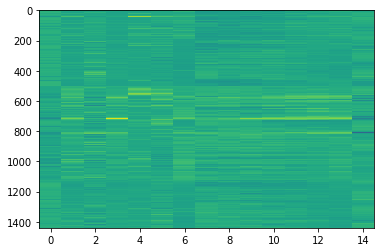

In [22]:
plt.imshow(f_vec_n,aspect='auto')

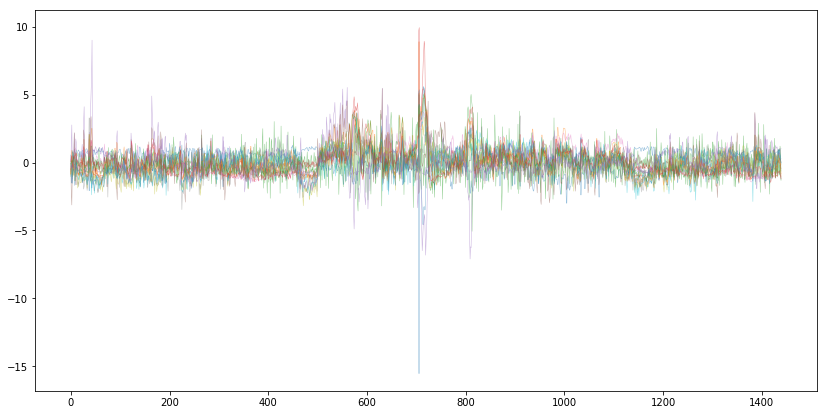

In [23]:
plt.figure(figsize=(14,7))
plt.plot(f_vec_n,alpha=.5,linewidth=.5);

In [24]:
import spectrotools as spec
importlib.reload(spec)

<module 'spectrotools' from '../spectrotools.py'>

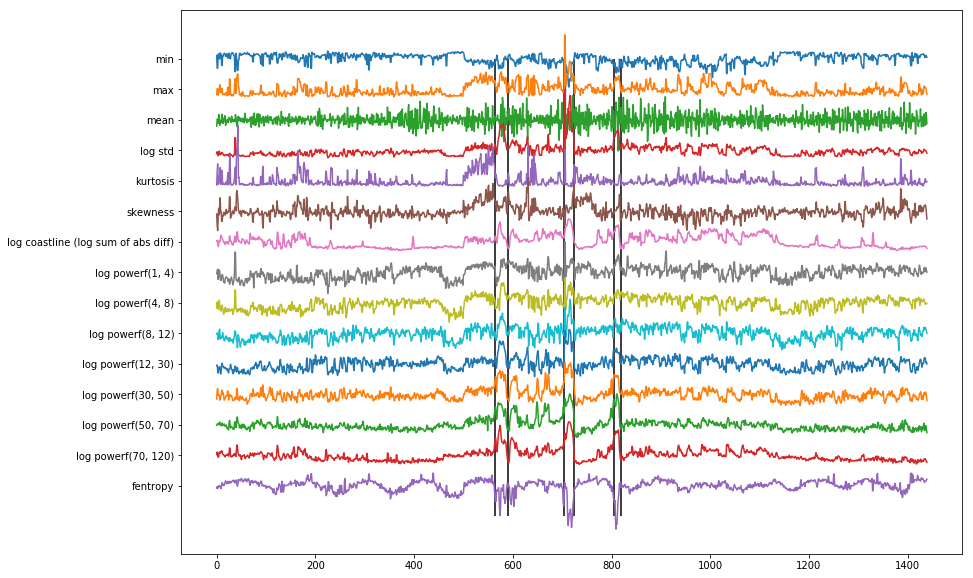

In [25]:
starts = [(annotation0.getStart()-it[index])/2.5 for annotation0 in project.current_animal.annotations.annotations_list]
ends = [(annotation0.getEnd()-it[index])/2.5 for annotation0 in project.current_animal.annotations.annotations_list]

f = plt.figure(figsize=(14,10))
ax = f.gca()
spec.plot_spread(f_vec_n,.5);

# plt.xlim([400,1000])
plt.vlines(starts[1:],-15,0)
plt.vlines(ends[1:],-15,0)
ax.set_yticks(range(0,-fe.number_of_features,-1))
ax.set_yticklabels(fe.settings['feature_labels'])

In [26]:
range(fe.number_of_features)

range(0, 15)

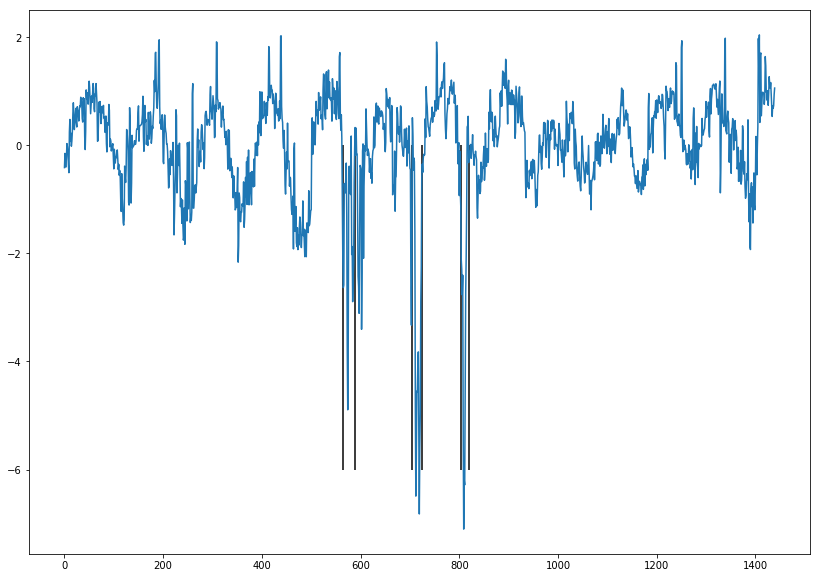

In [27]:

plt.figure(figsize=(14,10))
plt.plot(f_vec_n[:,-1]);
# plt.xlim([400,1000])
plt.vlines(starts[1:],-6,0)
plt.vlines(ends[1:],-6,0)

In [28]:
from numba import jit, njit
import timeit

In [29]:
@jit(nopython=True)
def reg_entropy_jit(fdata,fs):
    # regularized entropy of spectral data
    # fdata comes from rfft
    fdata_x_f = np.abs(fdata.ravel())*np.arange(1,len(fdata)+1)
    # print('fdata shape:',fdata_x_f.shape)
    fdata_x_f = fdata_x_f+1e-9*np.max(fdata_x_f)
    fdata_x_f = fdata_x_f**2/np.sum(fdata_x_f**2)
    return -np.sum(fdata_x_f*np.log(fdata_x_f))

# @jit(nopython=True)
def reg_entropy(fdata,fs):
    # regularized entropy of spectral data
    # fdata comes from rfft
    fdata_x_f = np.abs(fdata.ravel())*np.arange(1,len(fdata)+1)
    # print('fdata shape:',fdata_x_f.shape)
    fdata_x_f = fdata_x_f+1e-9*np.max(fdata_x_f)
    fdata_x_f = fdata_x_f**2/np.sum(fdata_x_f**2)
    return -np.sum(fdata_x_f*np.log(fdata_x_f))

In [30]:
# %%timeit
reg_entropy(np.random.randn(512*5,1),512)

6.701047303975813

In [31]:
# %%timeit
reg_entropy_jit(np.random.randn(512*5,1),512)

6.661980603622557

In [32]:
fb = FileBuffer(project.current_animal)

In [33]:
data,t =fb.get_data_from_range([1569851359, 1569851359+3600])

Non-contiguous data: restarting buffer...
Adding file to buffer:  /home/mfpleite/Shared/ele_data/h5_119/M1569851359_2019-09-30-14-49-19_tids_[119].meta
Adding file to buffer:  /home/mfpleite/Shared/ele_data/h5_119/M1569847759_2019-09-30-13-49-19_tids_[119].meta
Adding file to buffer:  /home/mfpleite/Shared/ele_data/h5_119/M1569854959_2019-09-30-15-49-19_tids_[119].meta
files in buffer:  ['/home/mfpleite/Shared/ele_data/h5_119/M1569851359_2019-09-30-14-49-19_tids_[119].meta', '/home/mfpleite/Shared/ele_data/h5_119/M1569847759_2019-09-30-13-49-19_tids_[119].meta', '/home/mfpleite/Shared/ele_data/h5_119/M1569854959_2019-09-30-15-49-19_tids_[119].meta']


In [34]:

from scipy.signal import stft, get_window
vf,t,z = stft(data.T,fs = 1/(t[10]-t[9]),nperseg=512*5,window='boxcar')

In [35]:
1569851359

1569851359

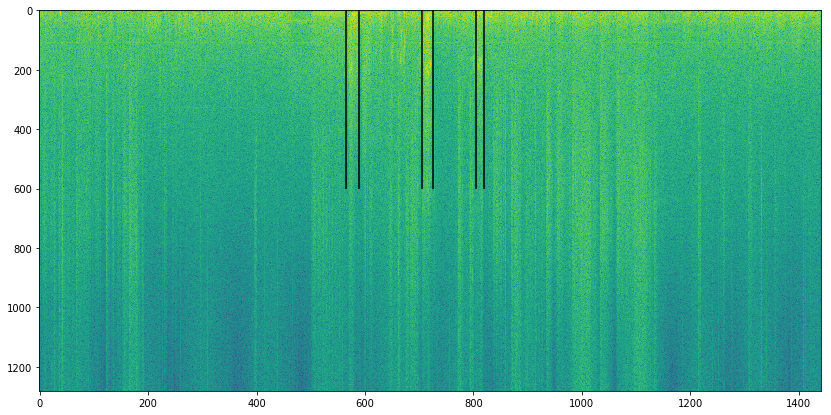

In [36]:
plt.figure(figsize=(14,7))
plt.imshow(np.log(np.abs(z[0])),aspect='auto')
# plt.ylim(0,200)

# plt.xlim(1000,1500)
plt.vlines(starts[1:],600,0)
plt.vlines(ends[1:],600,0)

In [37]:
z.shape

(1, 1281, 1441)

In [38]:
k=1
fdata_x_f = np.abs(z[0,k:,:])*np.arange(k,512*5/2+1)[:,np.newaxis]
# print('fdata shape:',fdata_x_f.shape)
fdata_x_f = fdata_x_f+1e-9*np.max(fdata_x_f)
fdata_x_f = fdata_x_f**2/np.sum(fdata_x_f**2,axis=0)[np.newaxis,:]
# fdata_x_f = fdata_x_f**4/np.sum(fdata_x_f**4,axis=0)[np.newaxis,:]

In [39]:
fdata_x_f.dtype

dtype('float64')

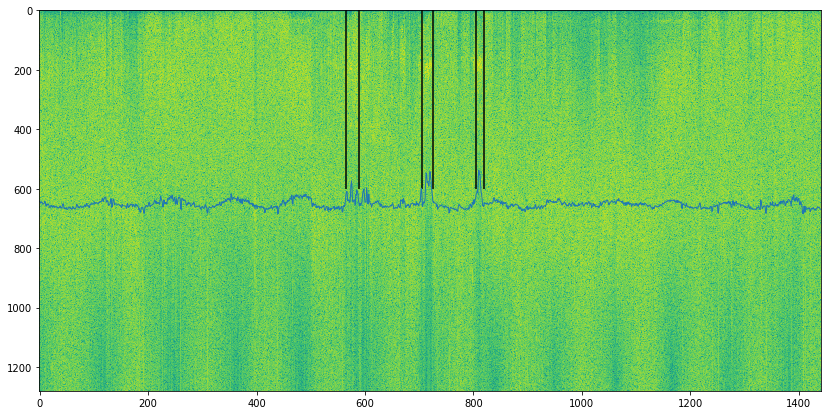

In [40]:
plt.figure(figsize=(14,7))
plt.imshow(np.log(fdata_x_f),aspect='auto')
# plt.ylim(0,200)
# plt.xlim(1000,1500)

plt.plot(-np.sum(100*fdata_x_f*np.log(fdata_x_f),axis=0),linewidth=1)
plt.vlines(starts[1:],600,0)
plt.vlines(ends[1:],600,0)

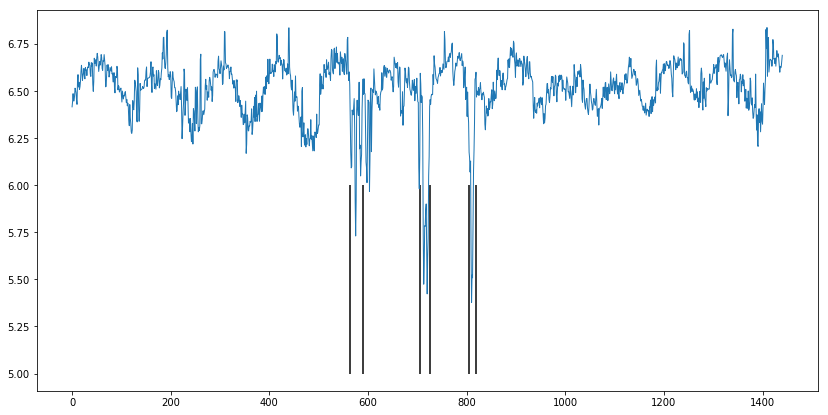

In [41]:
plt.figure(figsize=(14,7))
plt.plot(-np.sum(fdata_x_f*np.log(fdata_x_f),axis=0),linewidth=1)
# plt.xlim(5000,6000)

# plt.xlim(1000,1500)

plt.vlines(starts[1:],6,5)
plt.vlines(ends[1:],6,5)

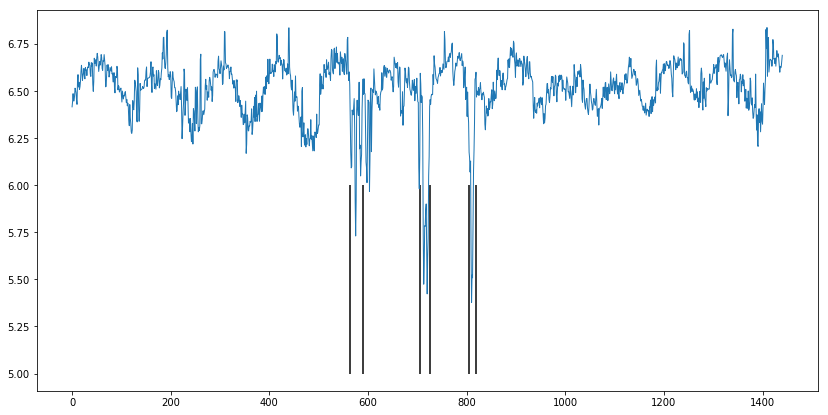

In [42]:
plt.figure(figsize=(14,7))
plt.plot(-np.sum(fdata_x_f*np.log(fdata_x_f),axis=0),linewidth=1)
# plt.xlim(5000,6000)

# plt.xlim(1000,1500)

plt.vlines(starts[1:],6,5)
plt.vlines(ends[1:],6,5)

In [43]:
from sklearn.decomposition import PCA


In [44]:
list(map(np.shape,[np.zeros(f_vec_n.shape[1]),np.diff(f_vec_n,axis=0)]))

[(15,), (1439, 15)]

In [65]:
pca = PCA(n_components=2)
f_vec_nd  = np.hstack([f_vec_n,np.vstack([np.zeros(f_vec_n.shape[1]),np.diff(f_vec_n,axis=0)])])
f_vec_nd  = np.hstack([f_vec_n])


f_vec_n_p = pca.fit_transform(f_vec_nd)

In [63]:
pca.components_@f_vec_d

ValueError: shapes (2,30) and (1440,15) not aligned: 30 (dim 1) != 1440 (dim 0)

In [66]:
f_vec_n.shape

(1440, 15)

In [67]:
f_vec_n_p.shape

(1440, 2)

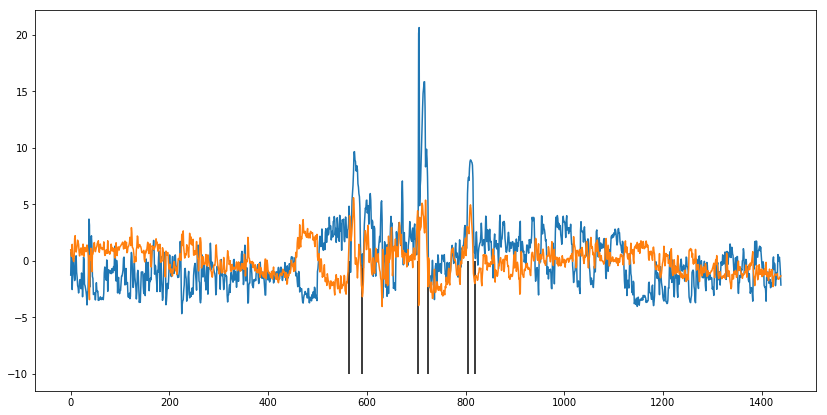

In [68]:
plt.figure(figsize=(14,7))
plt.plot(f_vec_n_p)
plt.vlines(starts[1:],-10,0)
plt.vlines(ends[1:],-10,0)

0 [1, 0, 0]
1 [0, 1, 0]
2 [0, 0, 1]
0 [1, 0, 0]
1 [0, 1, 0]
2 [0, 0, 1]


(-5, 5)

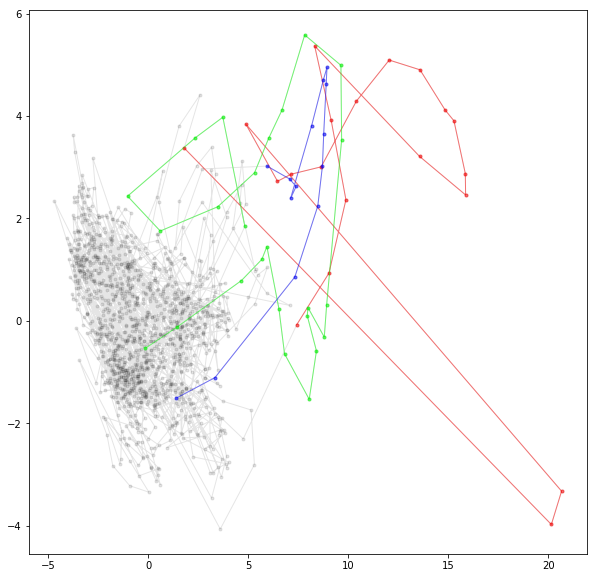

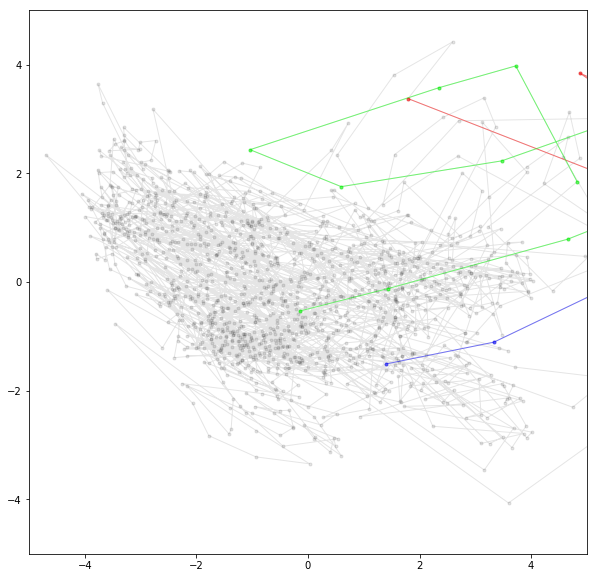

In [69]:
# f_vec_n_p = np.sign(f_vec_n_p)*np.sqrt(np.abs(f_vec_n_p))
plt.figure(figsize=(10,10))
plt.plot(f_vec_n_p[:,0],f_vec_n_p[:,1],'.-',linewidth=1,alpha=.1,color=[0,0,0])

for i in range(len(starts)-1) :
    s = int(starts[i+1])
    e = int(ends[i+1])
    color = [0,0,0]
    color[i%3]=1
    print(i,color)
    plt.plot(f_vec_n_p[s:e,0],f_vec_n_p[s:e,1],'.-',linewidth=1,alpha=.5,color=color)

plt.figure(figsize=(10,10))
plt.plot(f_vec_n_p[:,0],f_vec_n_p[:,1],'.-',linewidth=1,alpha=.1,color=[0,0,0])
67
for i in range(len(starts)-1) :
    s = int(starts[i+1])
    e = int(ends[i+1])
    color = [0,0,0]
    color[i%3]=1
    print(i,color)
    plt.plot(f_vec_n_p[s:e,0],f_vec_n_p[s:e,1],'.-',linewidth=1,alpha=.5,color=color)
plt.xlim(-5,5)
plt.ylim(-5,5)

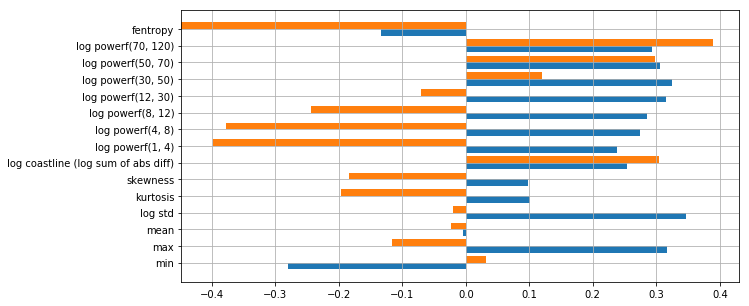

In [70]:
plt.figure(figsize=(10,5))
plt.barh(np.arange(15)-.2,pca.components_[0,:],height=.4);
plt.barh(np.arange(15)+.2,pca.components_[1,:],height=.4);
ax=plt.gca()
ax.set_yticks(range(0,fe.number_of_features,1))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.grid()

In [51]:
pca.components_[0,:].shape


(30,)

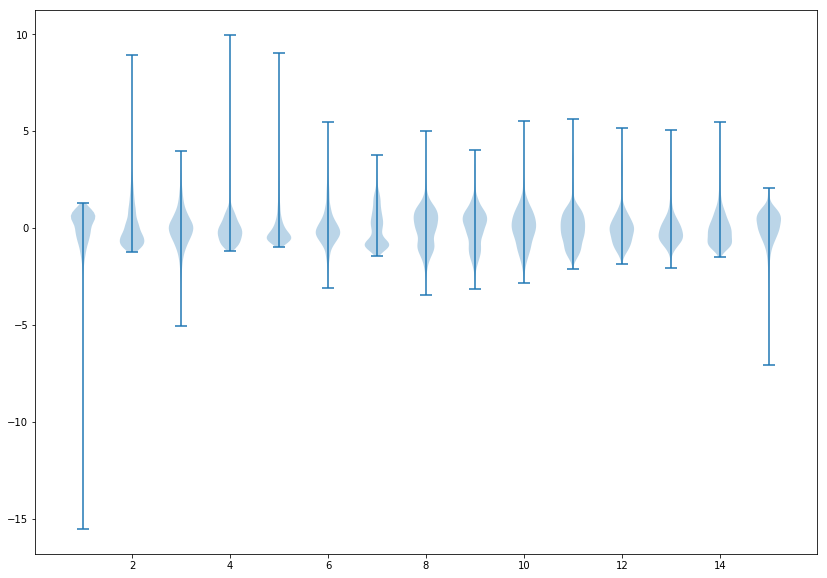

In [52]:
plt.figure(figsize=(14,10))
plt.violinplot(f_vec_n);

In [53]:
f_labels = np.zeros(len(f_vec_n),dtype='bool')
for i in range(len(starts)-1) :
    s = int(starts[i+1])
    e = int(ends[i+1])
    f_labels[s:e] = 1


In [58]:
f_vec_d  = np.hstack([f_vec,np.vstack([np.zeros(f_vec.shape[1]),np.diff(f_vec,axis=0)])])
f_vec_d  = f_vec
f_vec_d = f_vec_d-np.mean(f_vec_d,axis=0)
f_vec_d = f_vec_d/np.std(f_vec_d,axis = 0)

blanks = f_vec_d#[(1-f_labels).nonzero()[0],:]
seizures = f_vec_d[(f_labels).nonzero()[0],:]

blanks_mu  = blanks.mean(axis=0)
blanks_cov = (blanks-blanks_mu).T.dot((blanks-blanks_mu))/blanks.shape[0]
seizures_mu  = seizures.mean(axis=0)
seizures_cov = (seizures-seizures_mu).T.dot((seizures-seizures_mu))/seizures.shape[0]

In [59]:
f_vec_d.shape

(1440, 15)

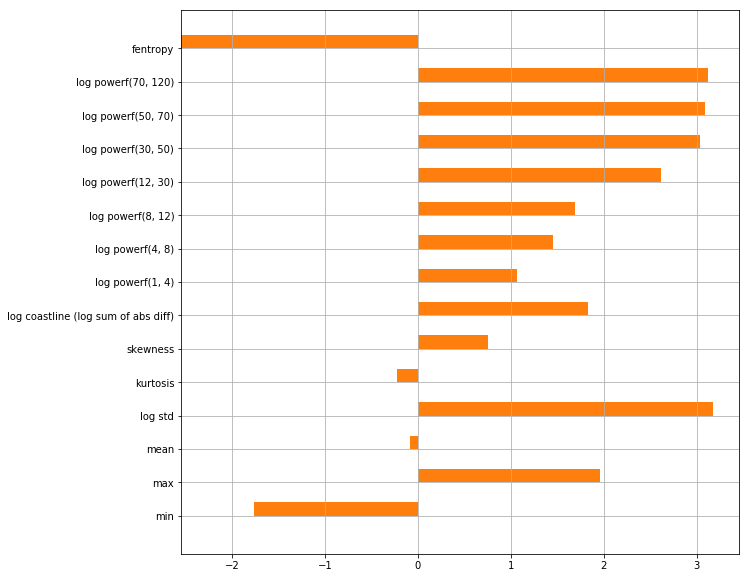

In [60]:
plt.figure(figsize=(10,10))
plt.barh(np.arange(len(seizures_mu))-.2,blanks_mu,height=.4);
plt.barh(np.arange(len(seizures_mu))+.2,seizures_mu,height=.4);
ax=plt.gca()
# ax.set_yticks(list(range(0,fe.number_of_features,1)) + 
#               list(range(fe.number_of_features,2*fe.number_of_features,1)))
# ax.set_yticklabels(fe.settings['feature_labels'] + ['d'+s+'/dt' for s in fe.settings['feature_labels']])
ax.set_yticks(list(range(0,fe.number_of_features,1)))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.grid()

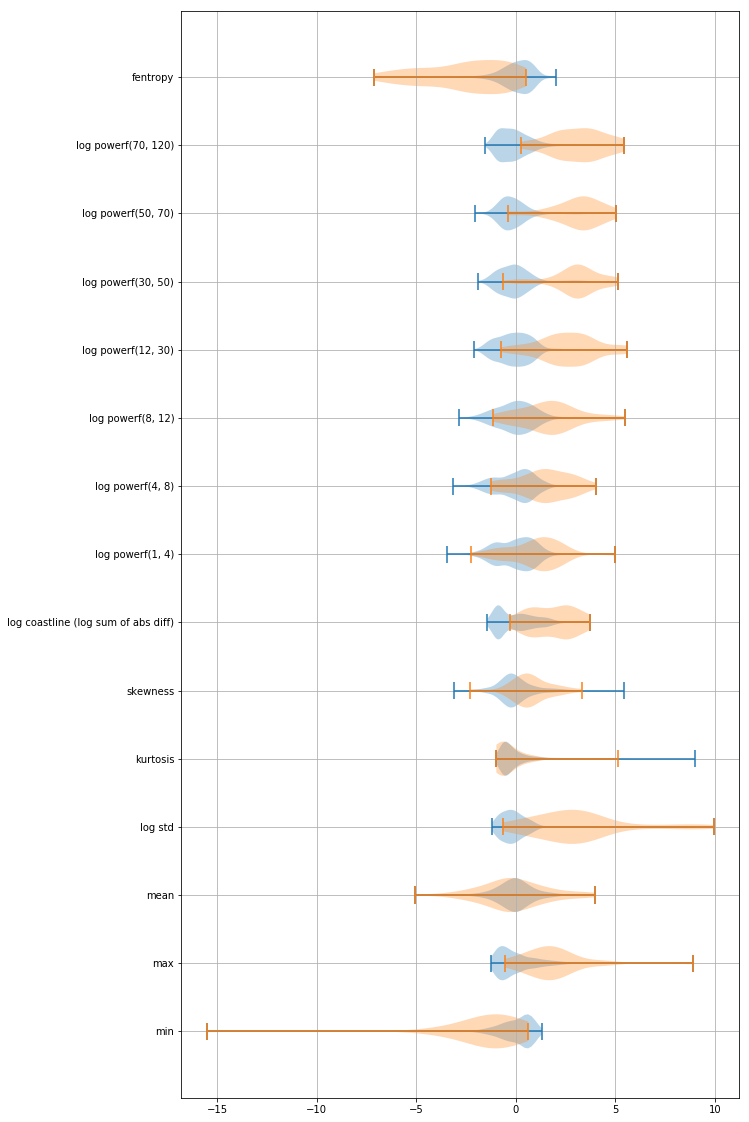

In [61]:
plt.figure(figsize=(10,20))
plt.violinplot(blanks,vert=False);
plt.violinplot(seizures,vert=False);
ax=plt.gca()
# ax.set_yticks(list(range(1,fe.number_of_features+1,1)) + 
#               list(range(fe.number_of_features+1,2*fe.number_of_features+1,1)))
# ax.set_yticklabels(fe.settings['feature_labels'] + ['d'+s+'/dt' for s in fe.settings['feature_labels']])
ax.set_yticks(list(range(1,fe.number_of_features+1,1)))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.grid()

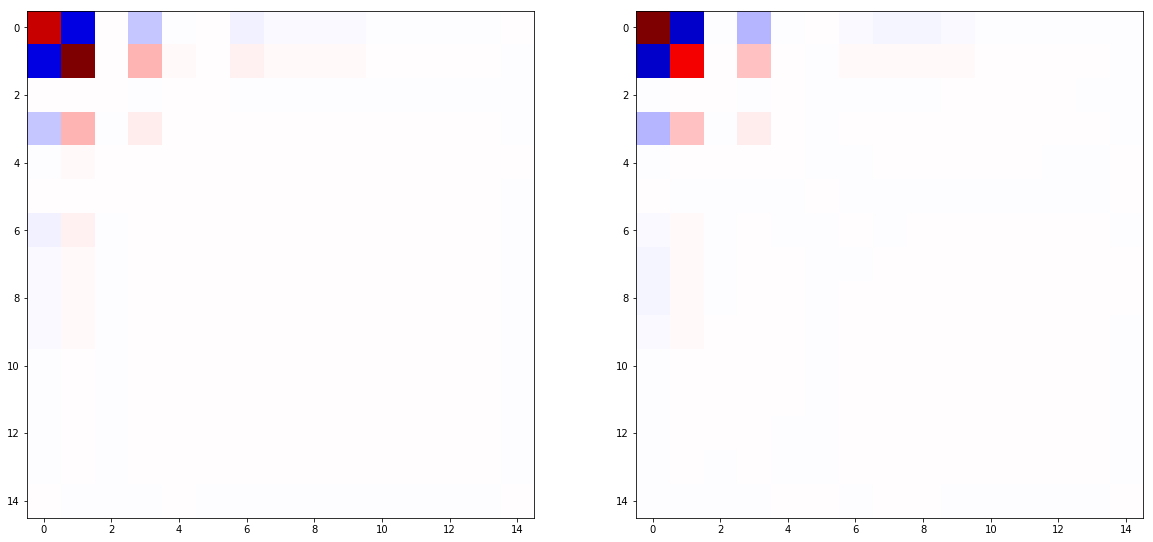

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(blanks_cov,cmap='seismic',vmin=-np.max(np.abs(blanks_cov)),vmax=np.max(np.abs(blanks_cov)))
plt.subplot(1,2,2)
plt.imshow(seizures_cov,cmap='seismic',vmin=-np.max(np.abs(seizures_cov)),vmax=np.max(np.abs(seizures_cov)))

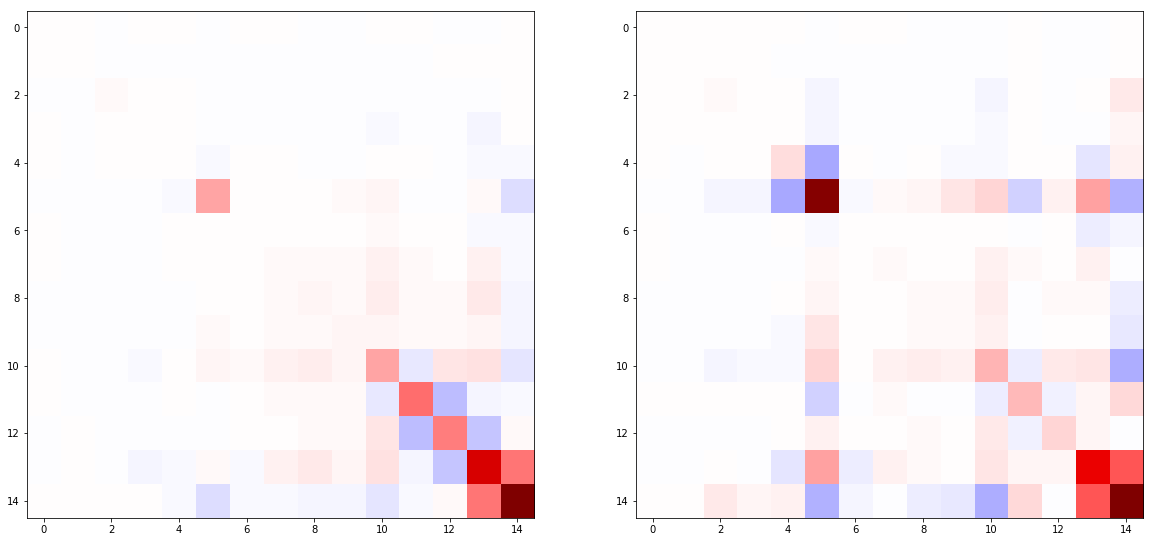

In [51]:
blanks_cov_i = np.linalg.inv(blanks_cov)
seizures_cov_i = np.linalg.inv(seizures_cov)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(blanks_cov_i,cmap='seismic',vmin=-np.max(np.abs(blanks_cov_i)),vmax=np.max(np.abs(blanks_cov_i)))
plt.subplot(1,2,2)
plt.imshow(seizures_cov_i,cmap='seismic',vmin=-np.max(np.abs(seizures_cov_i)),vmax=np.max(np.abs(seizures_cov_i)))

In [52]:
@jit(nopython=True)
def MVGD_LL_jit(fdata,mu,inv_cov,LL,no_scale):
    k = fdata.shape[1]
    N = fdata.shape[0]
    scale = (1-no_scale)*((-k/2)*np.log(2*np.pi)+1/2*np.log(np.linalg.det(inv_cov[:,:])))
    for i in range(N):
        LL[i] = scale - 0.5*(fdata[i,:]-mu)@(inv_cov[:,:] @(fdata[i,:]-mu).T)

def MVGD_LL(fdata,mu,inv_cov,no_scale = False):
    LL = np.zeros(fdata.shape[0])
    MVGD_LL_jit(fdata,mu,inv_cov,LL, no_scale)
    return LL

In [53]:
b_LLc = b_LL
s_LLc = s_LL

NameError: name 'b_LL' is not defined

(400, 1000)

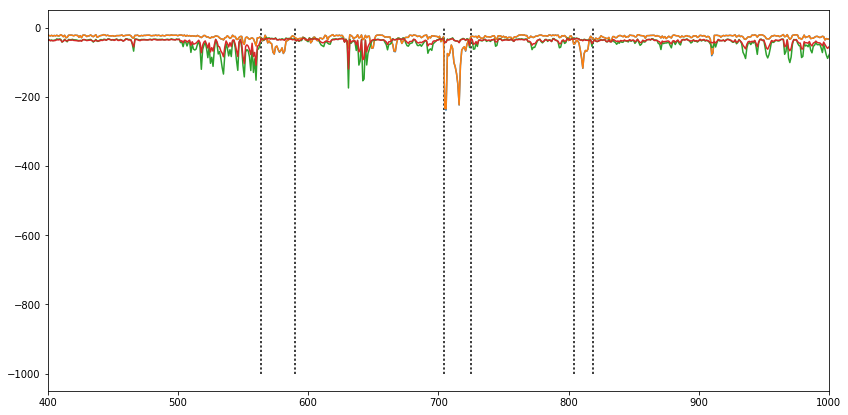

In [54]:
blanks_cov_i = np.linalg.inv(blanks_cov)
blanks_cov_ir = np.linalg.inv(blanks_cov+np.eye(len(blanks_cov))*blanks_cov.diagonal()/len(blanks))

seizures_cov_i = np.linalg.inv(seizures_cov)
seizures_cov_ir = np.linalg.inv(seizures_cov+np.eye(len(seizures_cov))*seizures_cov.diagonal()/len(seizures))

b_LL = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i)
s_LL = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i)
b_LLr = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_ir)
s_LLr = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_ir)

plt.figure(figsize=(14,7))
plt.plot(b_LL)
plt.plot(b_LLr)
plt.plot(s_LL)
plt.plot(s_LLr)
plt.vlines(starts[1:],-1000,0,linestyles=':')
plt.vlines(ends[1:],-1000,0,linestyles=':')
plt.xlim(400,1000)

In [55]:
from scipy import stats

In [56]:
blanks_LL = MVGD_LL(blanks,blanks_mu,blanks_cov_i,no_scale=True)
seizures_LL = MVGD_LL(seizures,seizures_mu,seizures_cov_i,no_scale=True)

In [57]:
blanks_cov_i.shape

(15, 15)

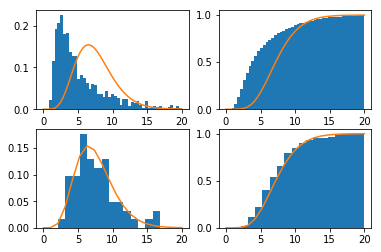

In [64]:
x = np.linspace(0,20,50)
chi2 = stats.chi2.pdf(x,15,scale=0.5)
plt.figure()
plt.subplot(221)
plt.hist(-blanks_LL,bins = x,normed = True);
plt.plot(x,chi2)

cum_chi2 = stats.chi2.cdf(x,15,scale=0.5)
plt.subplot(222)
plt.hist(-blanks_LL,bins = x,normed = True,cumulative=True);
plt.plot(x,cum_chi2)

x = np.linspace(0,20,20)
chi2 = stats.chi2.pdf(x,15,scale=0.5)
# plt.figure()
plt.subplot(223)
plt.hist(-seizures_LL,bins=x,normed=True);
plt.plot(x,chi2)

cum_chi2 = stats.chi2.cdf(x,15,scale=0.5)
plt.subplot(224)
plt.hist(-seizures_LL,bins = x,normed = True,cumulative=True);
plt.plot(x,cum_chi2)

(400, 1000)

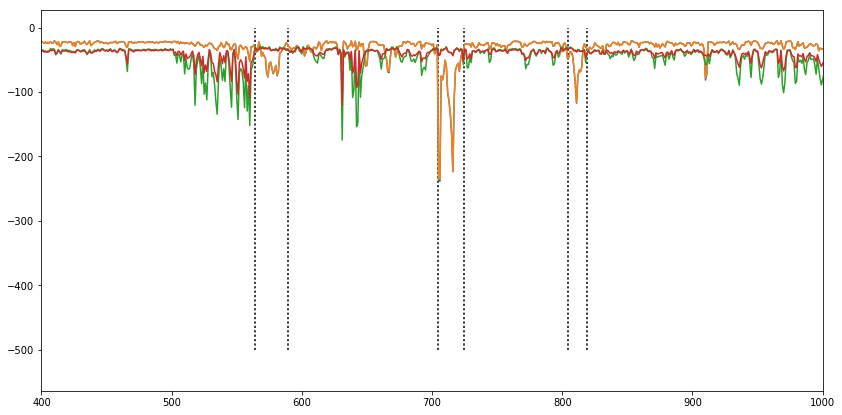

In [63]:
plt.figure(figsize=(14,7))
plt.plot(b_LL)
plt.plot(b_LLr)
plt.plot(s_LL)
plt.plot(s_LLr)
plt.vlines(starts[1:],-500,0,linestyles=':')
plt.vlines(ends[1:],-500,0,linestyles=':')
plt.xlim(400,1000)

In [59]:
@jit(nopython=True)
def LL2prob_jit(LL,prob):
    for i in range(LL.shape[0]):
        v = np.exp(LL[i,:])
        prob[i,:] = v / np.sum(v)
        
def LL2prob(LL):
    prob = np.zeros(LL.shape)
    LL2prob_jit(LL,prob)
    return prob

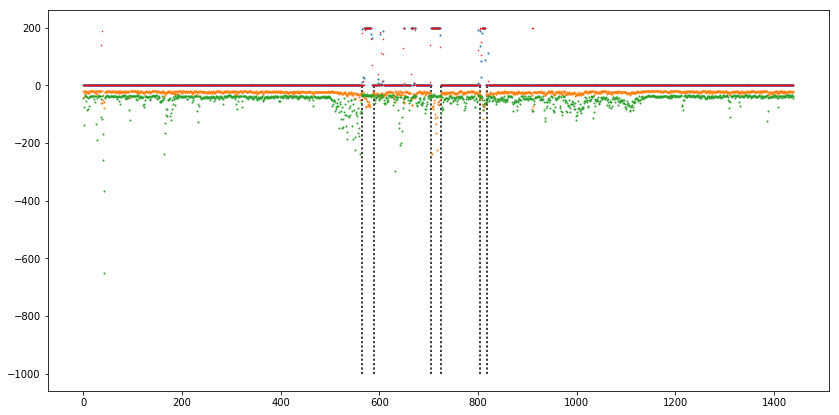

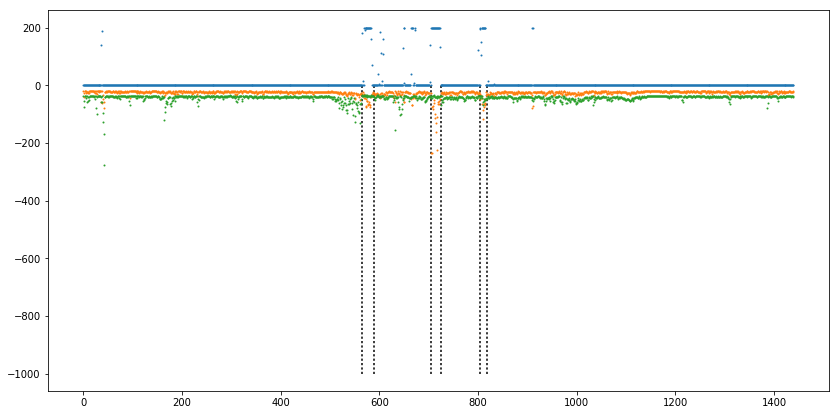

In [92]:
blank_bias = np.log(len(blanks)/(len(blanks)+len(seizures)))
seizure_bias = np.log(len(seizures)/(len(blanks)+len(seizures)))


b_LL = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i)+ blank_bias
s_LL = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i)+ seizure_bias
b_LLr = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_ir) + blank_bias
s_LLr = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_ir) + seizure_bias

LL = np.array([b_LL.T,s_LL.T]).T
p  = LL2prob(LL) 

LLr = np.array([b_LLr.T,s_LLr.T]).T
pr  = LL2prob(LLr) 

plt.figure(figsize=(14,7))
plt.plot(p[:,1]*200,'.',markersize=2)
plt.plot(pr[:,1]*200,'.',markersize=1,color = [1,0,0,1])
plt.plot(b_LL,'.',markersize=2)
plt.plot(s_LL,'.',markersize=2)
plt.vlines(starts[1:],-1000,0,linestyles=':')
plt.vlines(ends[1:],-1000,0,linestyles=':')
# plt.xlim(400,1000)

plt.figure(figsize=(14,7))
plt.plot(pr[:,1]*200,'.',markersize=2)
plt.plot(b_LLr,'.',markersize=2)
plt.plot(s_LLr,'.',markersize=2)
plt.vlines(starts[1:],-1000,0,linestyles=':')
plt.vlines(ends[1:],-1000,0,linestyles=':')
# plt.xlim(400,1000)

/home/mfpleite/anaconda3/envs/pyecog2_env/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


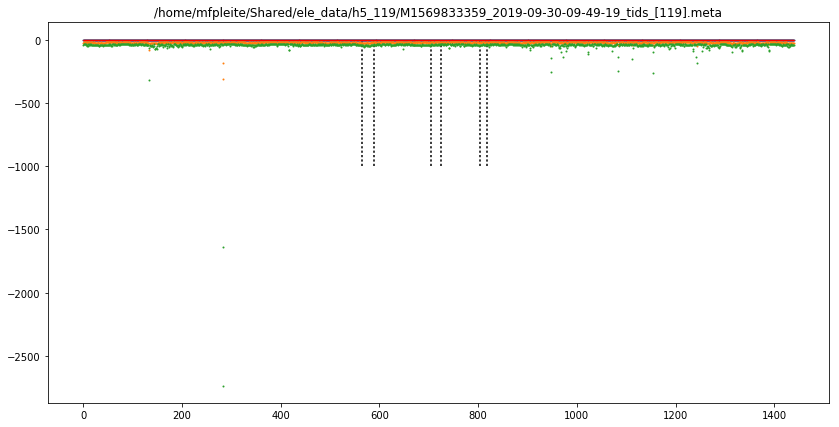

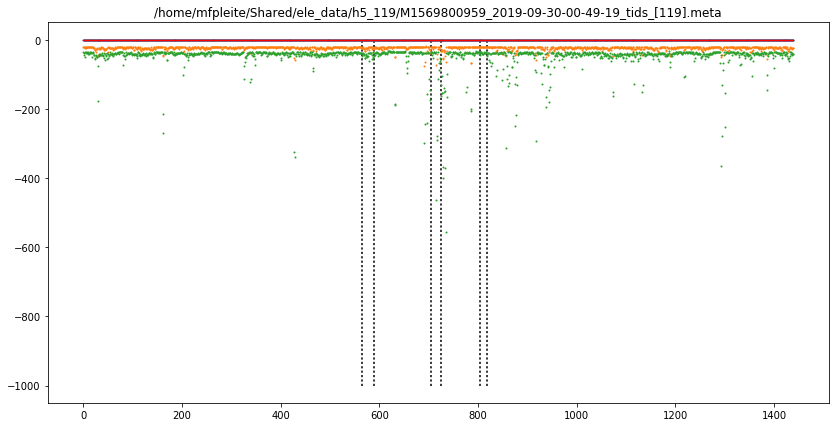

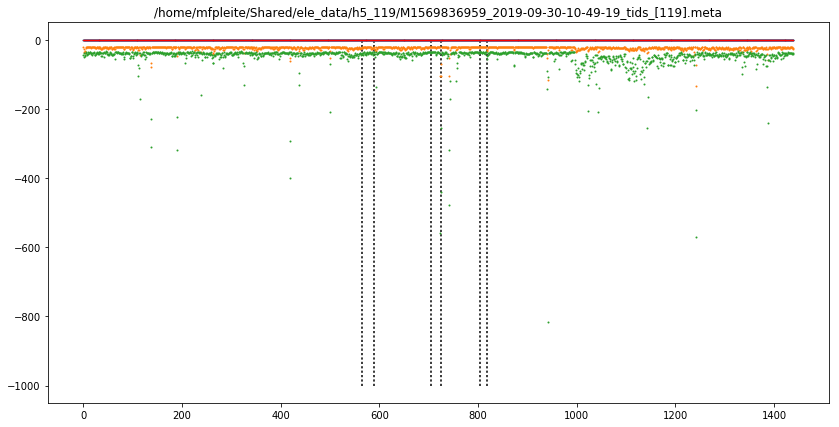

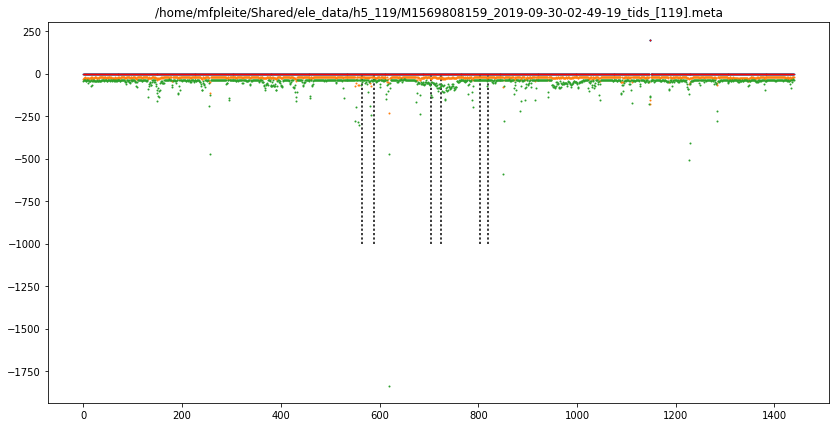

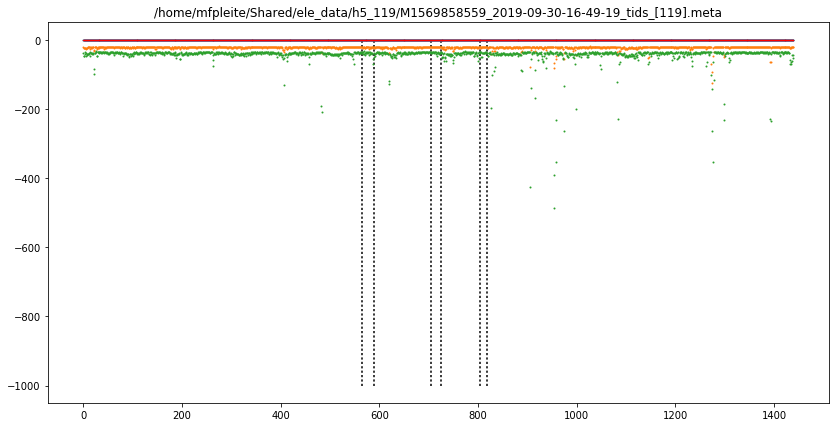

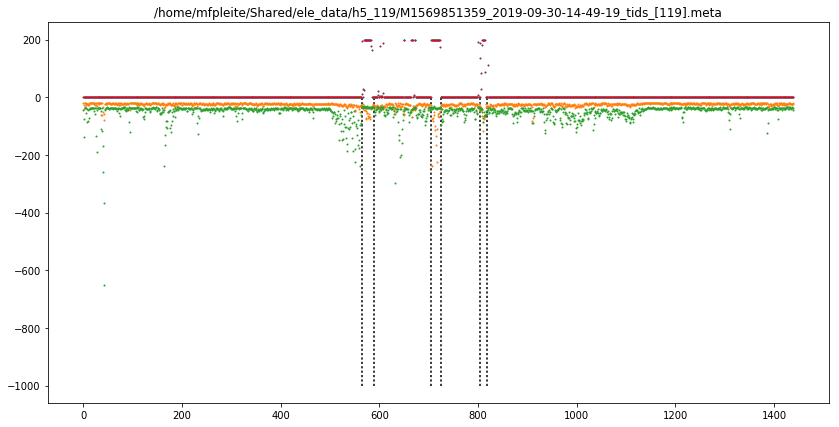

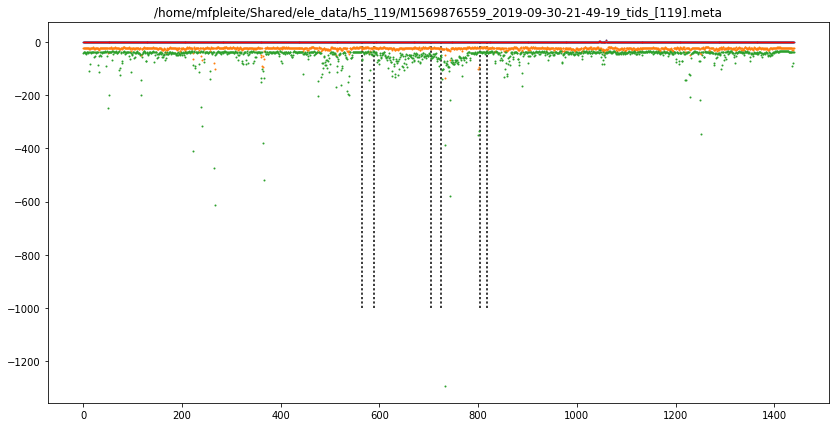

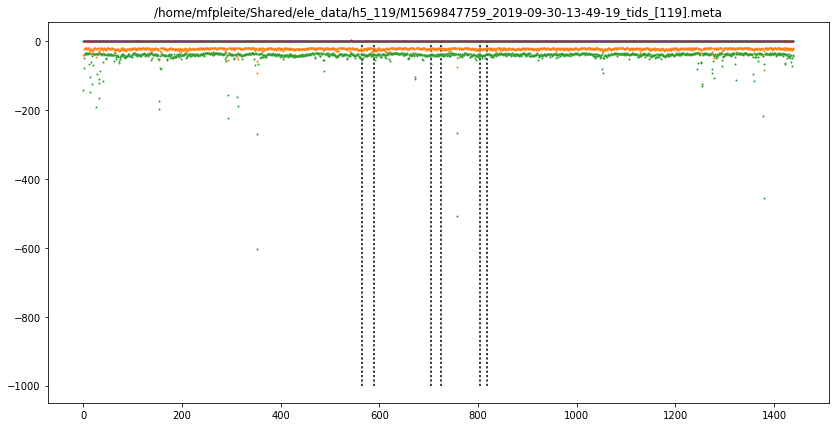

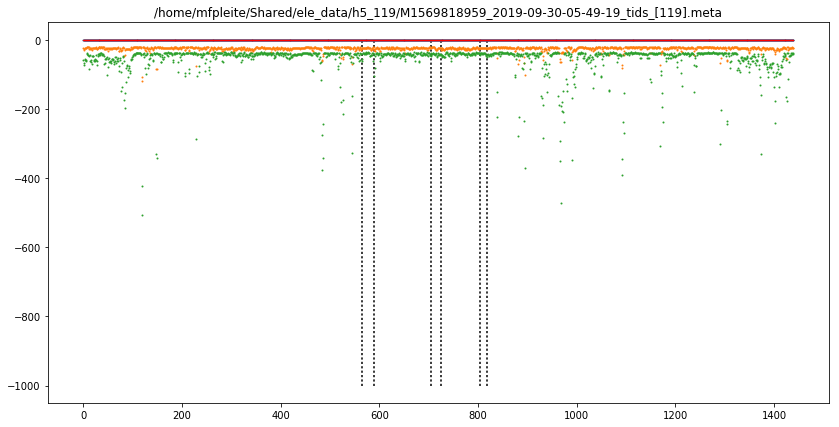

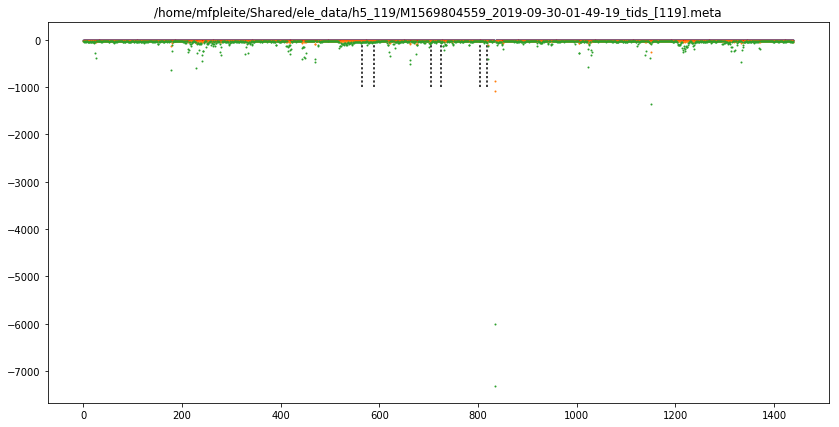

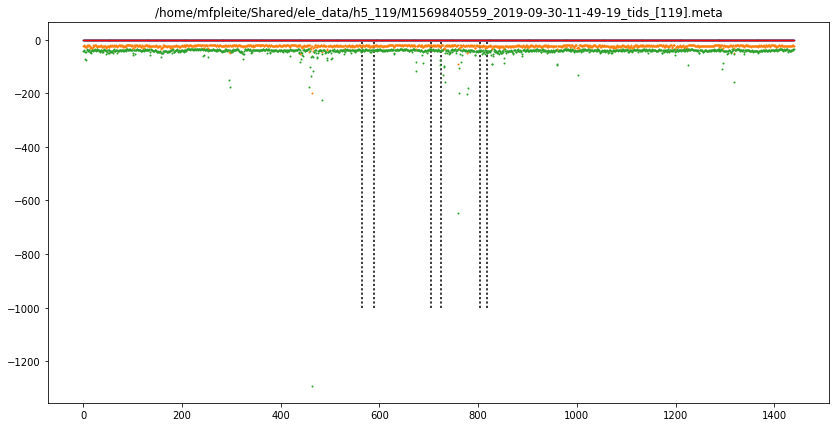

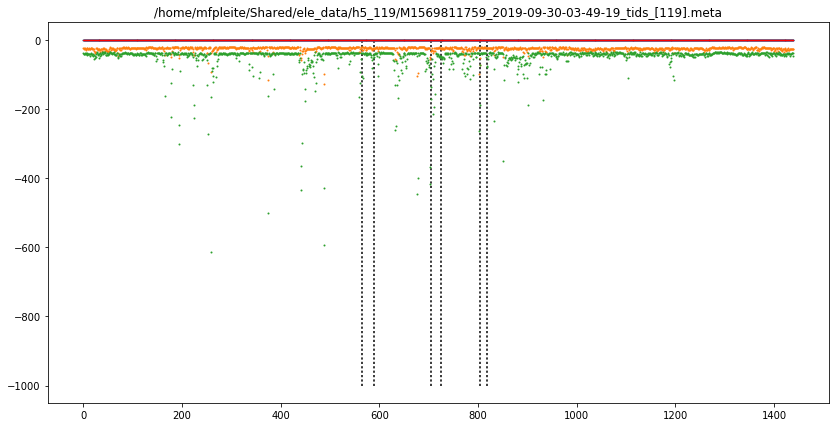

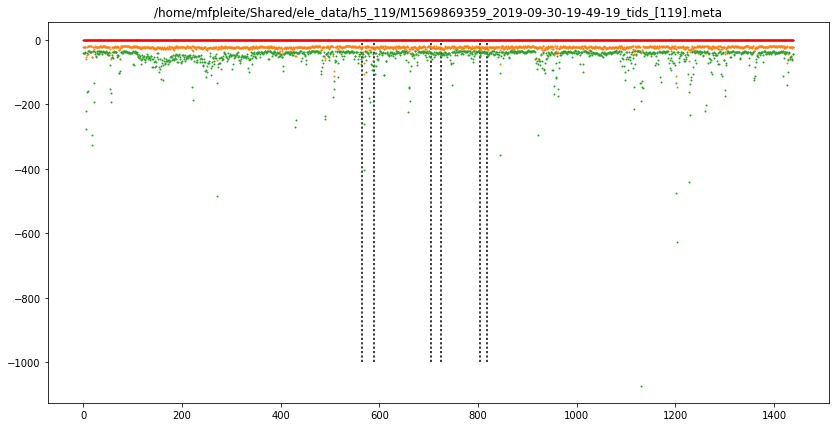

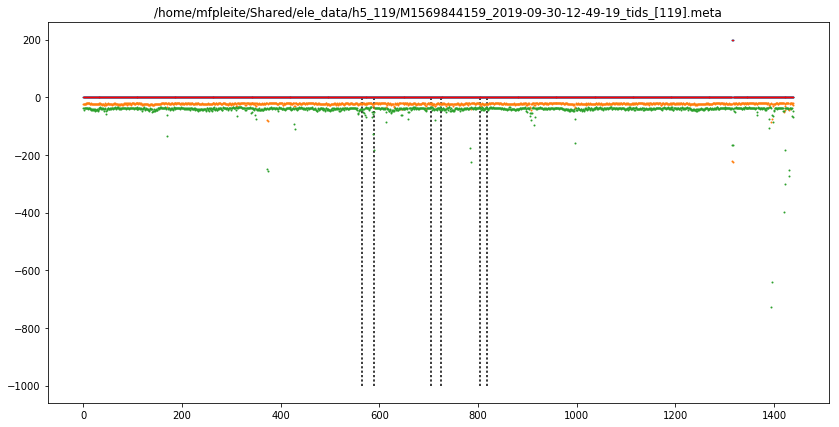

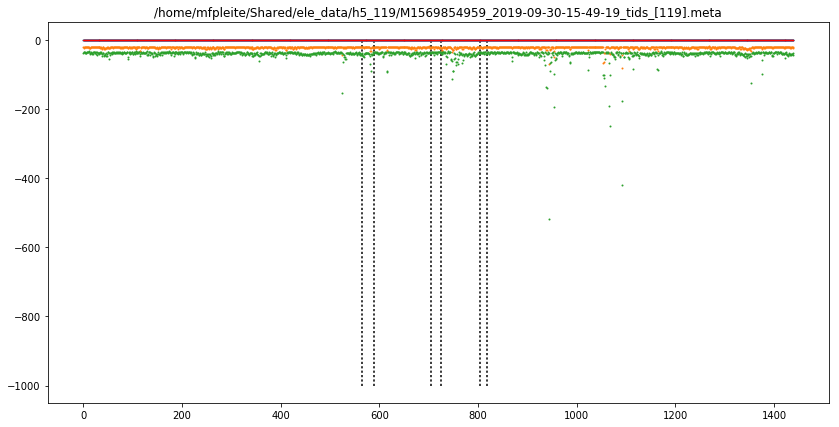

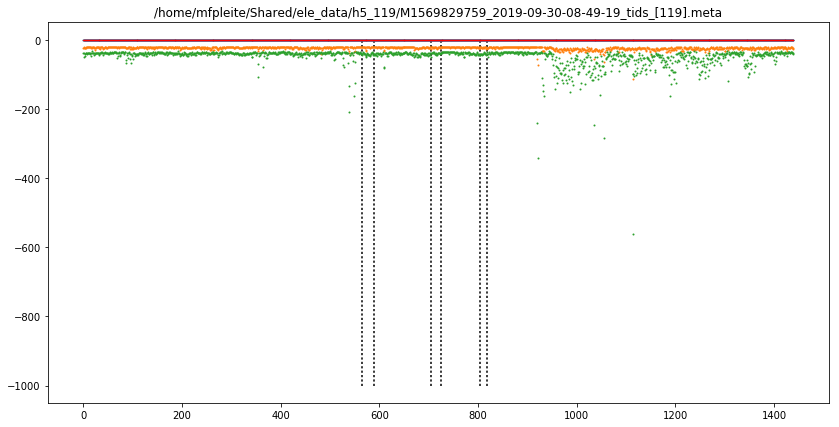

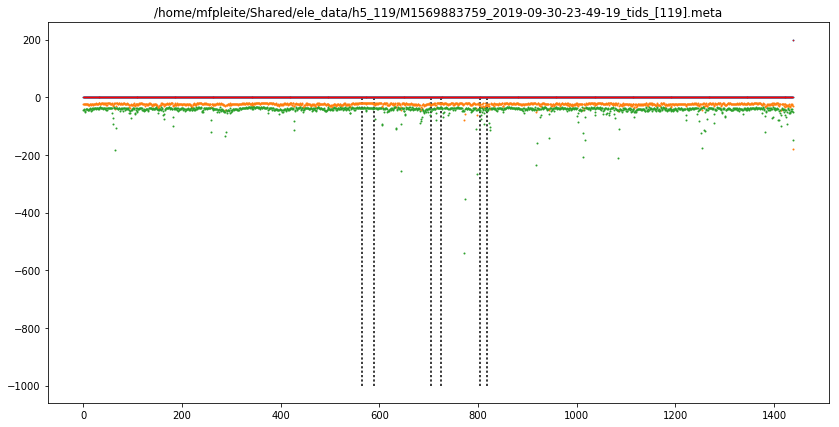

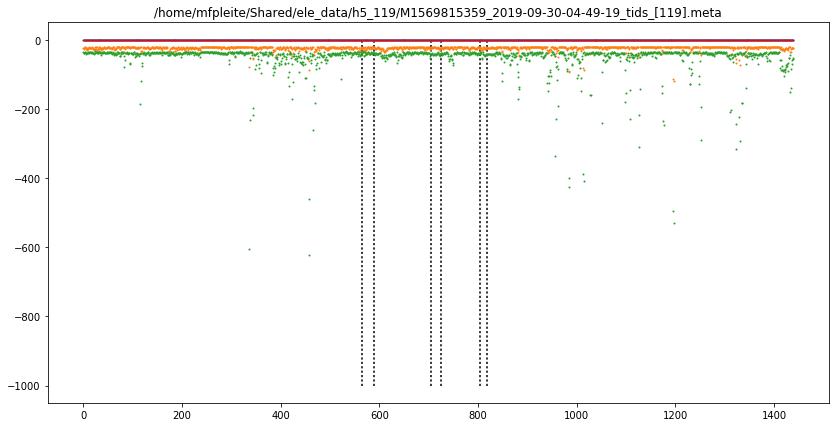

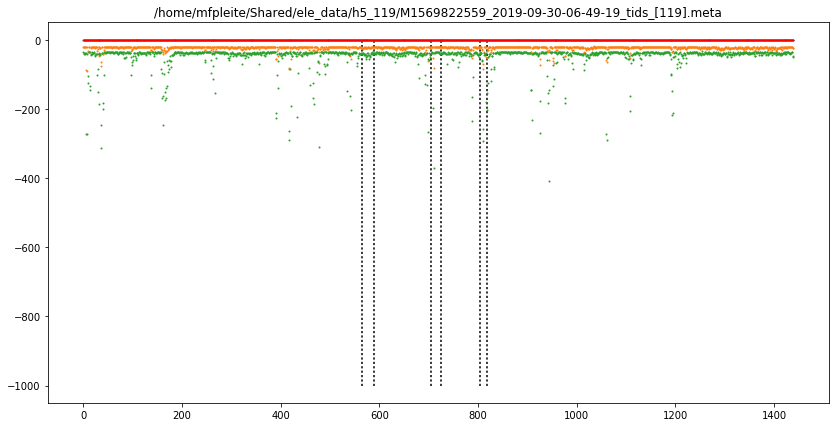

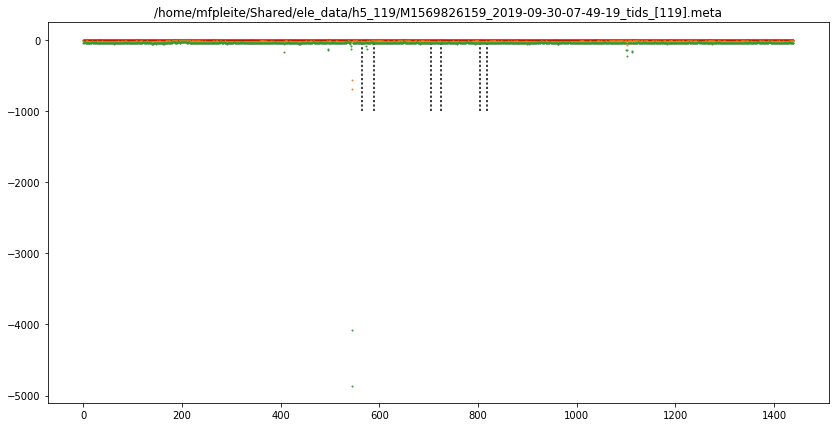

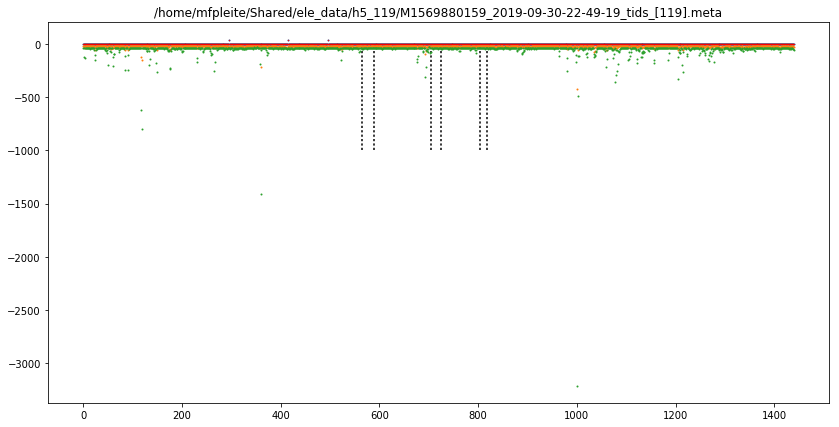

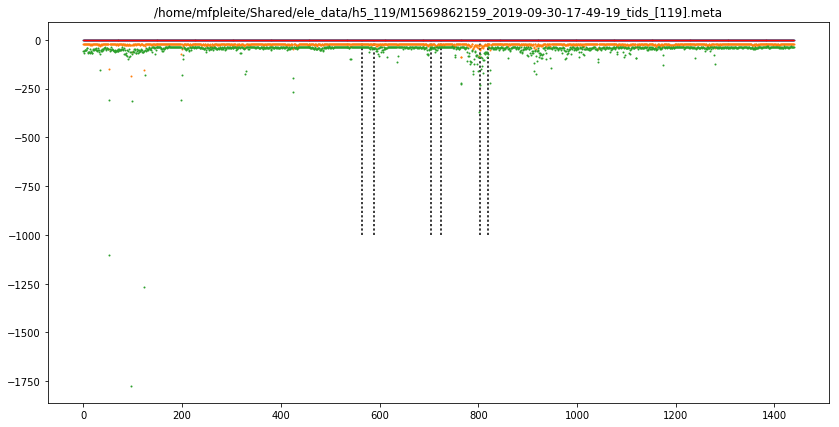

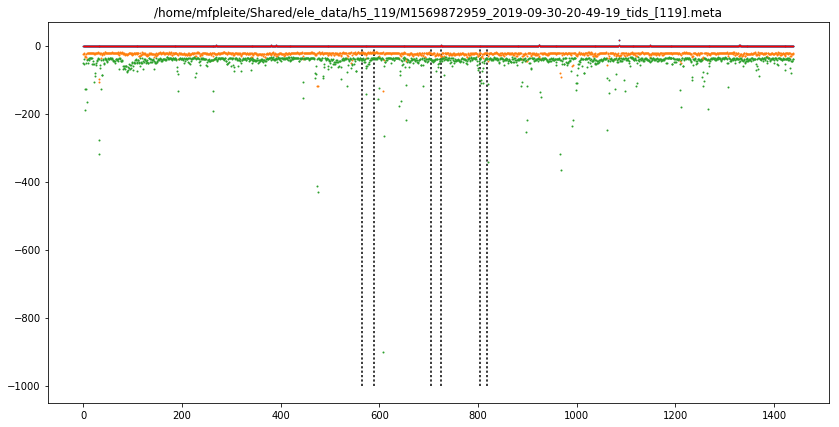

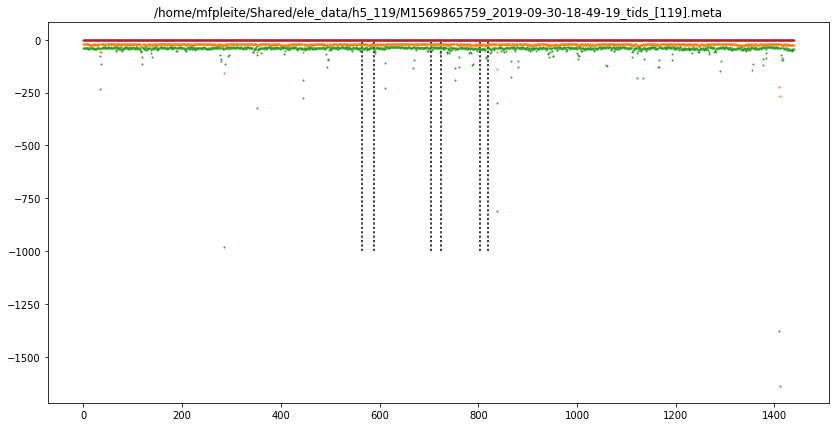

In [93]:
for eegfname in project.current_animal.eeg_files:
    fname = '.'.join(eegfname.split('.')[:-1]+['features'])
    f_vec = np.fromfile(fname,dtype='float64')
    f_vec_d = f_vec.reshape((-1,fe.number_of_features))
    
    b_LL = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i) + blank_bias
    s_LL = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i) + seizure_bias
    b_LLr = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i) + blank_bias
    s_LLr = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i) + seizure_bias

    LL = np.array([b_LL.T,s_LL.T]).T
    p  = LL2prob(LL) 

    LLr = np.array([b_LLr.T,s_LLr.T]).T
    pr  = LL2prob(LLr) 

    plt.figure(figsize=(14,7))
    plt.plot(p[:,1]*200,'.',markersize=2)
    plt.plot(pr[:,1]*200,'.',markersize=1,color = [1,0,0,1])
    plt.plot(b_LL,'.',markersize=2)
    plt.plot(s_LL,'.',markersize=2)
    plt.vlines(starts[1:],-1000,0,linestyles=':')
    plt.vlines(ends[1:],-1000,0,linestyles=':')
    plt.title(eegfname)
    # plt.xlim(400,1000)


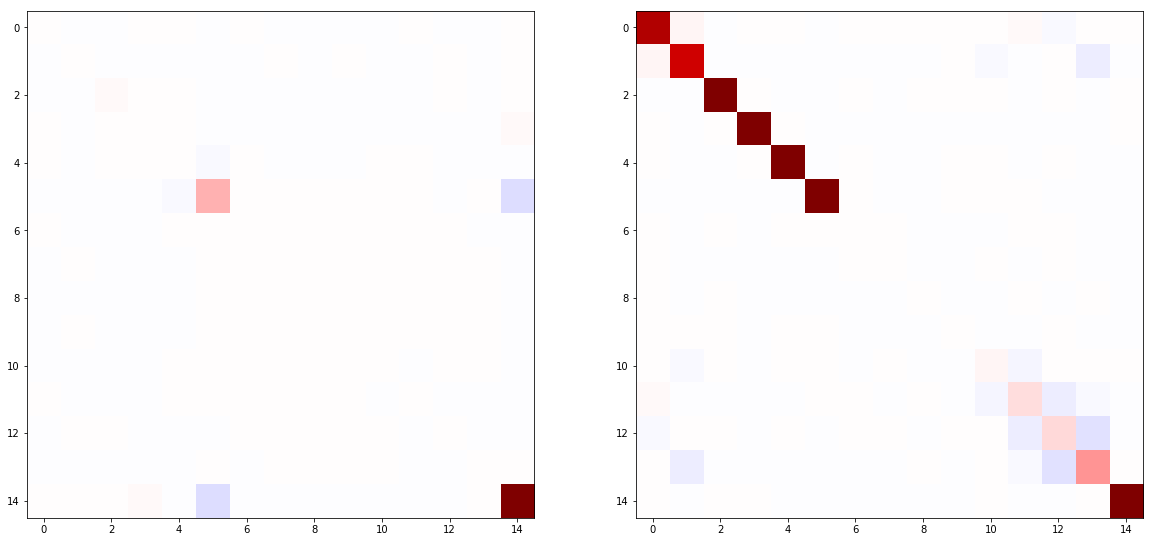

In [104]:
blanks_cov_i = np.linalg.inv(blanks_cov)
blanks_cov_ir = np.linalg.inv(blanks_cov+np.eye(len(blanks_cov))*np.mean(blanks_cov.diagonal())/len(blanks))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(blanks_cov_i,cmap='seismic',vmin=-np.max(np.abs(blanks_cov_i)),vmax=np.max(np.abs(blanks_cov_i)))
plt.subplot(1,2,2)
plt.imshow(blanks_cov_ir,cmap='seismic',vmin=-np.max(np.abs(blanks_cov_ir)),vmax=np.max(np.abs(blanks_cov_ir)))

In [162]:
1/np.linalg.det(blanks_cov_i)

1.3922821808006248e-11

In [57]:
1/np.linalg.det(blanks_cov_ir)

1.6175683502327184e-11

In [127]:
30*24


720

In [152]:
w = (1000*2*np.pi)
m = 10

In [153]:

E = 1/2*m*r**2*w**2

NameError: name 'r' is not defined

In [154]:
np.sqrt(2*30000*3600/m/w**2)

0.7396853328737999

In [137]:
w

39478417.60435743

In [66]:
a = np.array([[-1,1],[1,2],[1,3]])

In [74]:
a[(a[:,0]>=0)& (a[:,1]<3),:]

array([[1, 2]])

In [69]:
for b in a:
    print(b)

[-1  1]
[1 2]
[1 3]


In [70]:
np.cov(a)

array([[2. , 1. , 2. ],
       [1. , 0.5, 1. ],
       [2. , 1. , 2. ]])

In [71]:
a

array([[-1,  1],
       [ 1,  2],
       [ 1,  3]])

In [79]:
b = np.array([1,0,3])

In [91]:
np.outer(b,)

TypeError: outer() missing 1 required positional argument: 'b'

In [90]:
b[:,np.newaxis]@b[np.newaxis,:]

array([[1, 0, 3],
       [0, 0, 0],
       [3, 0, 9]])